In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans, dbscan
import random
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.figure import Figure

# Descomentar no final
import warnings
warnings.filterwarnings('ignore')

### Metodos auxiliares

In [2]:
columns = ["ID", "ACC_X", "ACC_Y", "ACC_Z", "GYRO_X", "GYRO_Y", "GYRO_Z", "MAG_X", "MAG_Y", "MAG_Z", "TIMESTAMP", "ACT_LABEL"] 
part = "0"
dev = "1"

<h1>Import Data</h1>

In [3]:
my_data = np.genfromtxt('FORTH_TRACE_DATASET/part' + part + '/part' + part + 'dev' + dev + '.csv', delimiter=',')
data = pd.DataFrame(my_data, columns=columns)
data

ID   ACC_X   ACC_Y   ACC_Z   GYRO_X    GYRO_Y    GYRO_Z    MAG_X  \
0      1.0 -1.8650  9.3890  2.5812 -1.14180 -1.185600  0.849980 -0.34476   
1      1.0 -1.7963  9.3742  2.4460 -1.56180 -0.661650  0.597300 -0.34274   
2      1.0 -1.8696  9.3000  2.3514 -1.18770 -1.284100  0.142120 -0.34476   
3      1.0 -1.7961  9.3624  2.4584 -0.58399 -2.033400  0.429120 -0.32863   
4      1.0 -1.6768  9.3506  2.4685 -0.37050 -1.364700  0.371940 -0.33669   
...    ...     ...     ...     ...      ...       ...       ...      ...   
53115  1.0 -2.2033  9.3479  2.3327 -1.50120 -0.092005 -0.117810  0.22581   
53116  1.0 -2.1798  9.3235  2.3205 -1.59020 -0.091795 -0.007825  0.21169   
53117  1.0 -2.1324  9.3112  2.3076 -1.69930 -0.379580  0.132570  0.22379   
53118  1.0 -2.1327  9.3110  2.2955 -1.55450 -0.241180  0.180670  0.22782   
53119  1.0 -2.1334  9.2982  2.2591 -1.69560  0.881400  0.373460  0.21169   

         MAG_Y    MAG_Z   TIMESTAMP  ACT_LABEL  
0      0.59839  1.01340      505.89        1.0  
1      0.57631  1.00000      525.42        1.0  
2      0.59639  1.01560      544.95        1.0  
3      0.62249  1.01560      564.48        1.0  
4      0.62048  1.02450      584.01        1.0  
...        ...      ...         ...        ...  
53115  0.87751  0.53898  1037900.00        1.0  
53116  0.89759  0.53898  1037900.00        1.0  
53117  0.90361  0.54343  1037900.00        1.0  
53118  0.89558  0.55234  1038000.00        1.0  
53119  0.89558  0.54120  1038000.00        1.0  

[53120 rows x 12 columns]

<h1>Ex 3.1</h1>

In [4]:
activities = [i + 1 for i in range(16)]
activities_labels = ["palha", "Stand", "Sit", "Sit and Talk", "Walk", "Walk and Talk", "Climb Stair", "Climb Stair and Talk", "Stand to Sit", "Sit to Stand", "Stand to Sit and Talk", "Sit to Stand and Talk", "Stand to Walk", "Walk to Stand", "Stand to Climb Stairs / Stand to Climb Stairs and Talk", "Climb Stairs to Walk", "Climb Stairs and Talk to Walk and Talk"]
sensors = ['ACC', 'GYRO', 'MAG']

In [5]:
def return_activity(data,act):
    return data[data["ACT_LABEL"]==act]

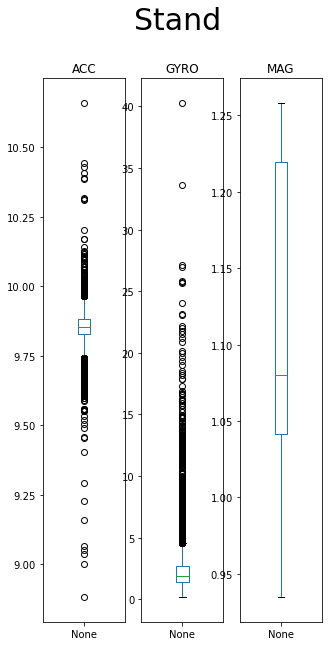

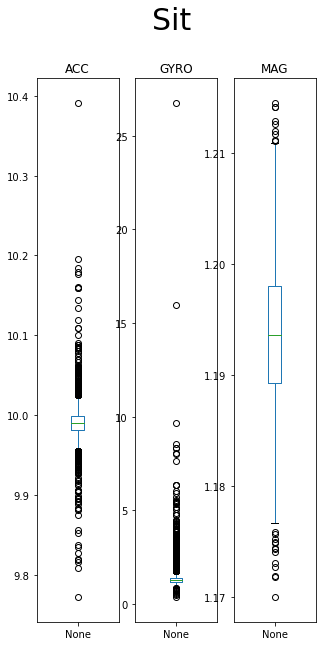

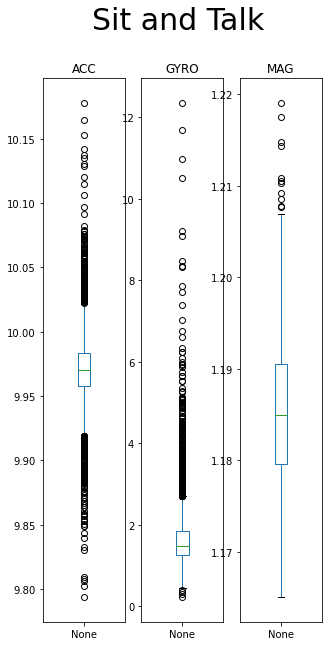

In [6]:
transformed_data = {}
max_activities_to_plot = 3
to_plot = True
contador = 0
for act in activities:
    modulo = return_activity(data,act)
    ACC_BOX_PLOT = np.sqrt(pow(modulo["ACC_X"], 2) + pow(modulo["ACC_Y"], 2) + pow(modulo["ACC_Z"], 2))
    GYRO_BOX_PLOT = np.sqrt(pow(modulo["GYRO_X"], 2) + pow(modulo["GYRO_Y"], 2) + pow(modulo["GYRO_Z"], 2))
    MAG_BOX_PLOT = np.sqrt(pow(modulo["MAG_X"], 2) + pow(modulo["MAG_Y"], 2) + pow(modulo["MAG_Z"], 2))
    frame = {'ACC': ACC_BOX_PLOT, 'GYRO': GYRO_BOX_PLOT,'MAG': MAG_BOX_PLOT}
    join_series = pd.DataFrame(frame)
    transformed_data[activities_labels[act]] = join_series
  
    if to_plot:
        fig,ax = plt.subplots(1,3)
        fig.suptitle(activities_labels[act], fontsize=30)
    
        plt.subplot(131)
        plt.title("ACC")
        ACC_BOX_PLOT.plot.box(figsize = (5,10))
       
        plt.subplot(132)
        plt.title("GYRO")
        GYRO_BOX_PLOT.plot.box(figsize = (5,10))
    
        plt.subplot(133)
        plt.title("MAG")
        MAG_BOX_PLOT.plot.box(figsize = (5,10))
    
        if contador == max_activities_to_plot - 1:
            to_plot = False
        
        contador += 1

# Ex 3.2


In [7]:
def density(data, nr, k):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    ul = k * IQR + Q3
    ll = -k * IQR + Q1
    n0 = len(data[(data > ul) | (data < ll)])
    return float(n0) / float(nr) * 100.0

In [8]:
k = 1.5
nr = len(transformed_data["Stand"]['MAG'])

density_dataFrame = pd.DataFrame(columns=["Activity", "Sensor", "Density"])
for act in activities_labels[1:]:
    for sen in sensors:
        new_row = pd.Series(data={'Activity': act, 'Sensor': sen, 'Density': density(transformed_data[act][sen], nr, k)})
        density_dataFrame = density_dataFrame.append(new_row, ignore_index=True)
        
density_dataFrame

Activity Sensor   Density
0                                               Stand    ACC  3.496186
1                                               Stand   GYRO  7.618961
2                                               Stand    MAG  0.000000
3                                                 Sit    ACC  2.070469
4                                                 Sit   GYRO  3.995641
5                                                 Sit    MAG  0.199782
6                                        Sit and Talk    ACC  2.860516
7                                        Sit and Talk   GYRO  2.996731
8                                        Sit and Talk    MAG  0.099891
9                                                Walk    ACC  2.097712
10                                               Walk   GYRO  0.671994
11                                               Walk    MAG  0.009081
12                                      Walk and Talk    ACC  1.943335
13                                      Walk and Talk   GYRO  0.644751
14                                      Walk and Talk    MAG  0.908100
15                                        Climb Stair    ACC  1.725390
16                                        Climb Stair   GYRO  0.553941
17                                        Climb Stair    MAG  1.661823
18                               Climb Stair and Talk    ACC  0.790047
19                               Climb Stair and Talk   GYRO  0.299673
20                               Climb Stair and Talk    MAG  0.399564
21                                       Stand to Sit    ACC  0.899019
22                                       Stand to Sit   GYRO  0.254268
23                                       Stand to Sit    MAG  0.653832
24                                       Sit to Stand    ACC  0.490374
25                                       Sit to Stand   GYRO  0.426807
26                                       Sit to Stand    MAG  0.108972
27                              Stand to Sit and Talk    ACC  0.998910
28                              Stand to Sit and Talk   GYRO  0.444969
29                              Stand to Sit and Talk    MAG  0.481293
30                              Sit to Stand and Talk    ACC  0.563022
31                              Sit to Stand and Talk   GYRO  0.354159
32                              Sit to Stand and Talk    MAG  0.154377
33                                      Stand to Walk    ACC  0.099891
34                                      Stand to Walk   GYRO  0.054486
35                                      Stand to Walk    MAG  0.000000
36                                      Walk to Stand    ACC  0.190701
37                                      Walk to Stand   GYRO  0.236106
38                                      Walk to Stand    MAG  0.000000
39  Stand to Climb Stairs / Stand to Climb Stairs ...    ACC  0.217944
40  Stand to Climb Stairs / Stand to Climb Stairs ...   GYRO  0.000000
41  Stand to Climb Stairs / Stand to Climb Stairs ...    MAG  0.000000
42                               Climb Stairs to Walk    ACC  0.099891
43                               Climb Stairs to Walk   GYRO  0.000000
44                               Climb Stairs to Walk    MAG  0.063567
45             Climb Stairs and Talk to Walk and Talk    ACC  0.009081
46             Climb Stairs and Talk to Walk and Talk   GYRO  0.000000
47             Climb Stairs and Talk to Walk and Talk    MAG  0.009081

### Análise da densidade
<p> Demonstramos em cima a tabela que nos mostra a densidade de 
outliers para cada atividade e sensor</p>

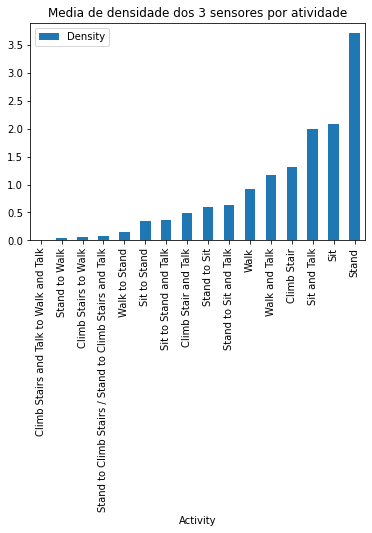

In [9]:
density_dataFrame.groupby("Activity").mean().sort_values("Density").plot(kind="bar")
plt.title("Media de densidade dos 3 sensores por atividade")
plt.show()

#### Podemos conluir que a atividade "Stand" é de longe a que tem maior densidade de outliers.
#### Por outro lado, a Climb Strairs to Walk and Talk é a que tem menos outliers

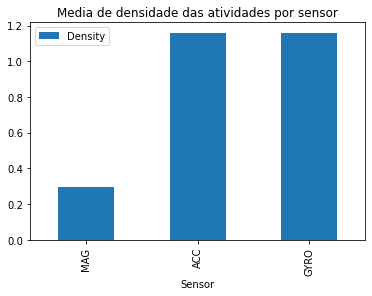

In [10]:
density_dataFrame.groupby("Sensor").mean().sort_values("Density").plot(kind="bar")
plt.title("Media de densidade das atividades por sensor")
plt.show()

#### Pelo gráfico acima concluimos que o sensor de Magnometro é que tem menor densidade de outliers em comparação com os outros 2 sensores

# Ex 3.3

In [11]:
def z_score(data,k):
    mean = data.mean()
    std = data.std()
    z_score = abs((data-mean)/std)
    return data[z_score < k],data[z_score >= k]

In [12]:
# Exemplo de teste

data_teste = np.array([80, 71, 79, 61, 78, 73, 77, 74, 76, 75, 160, 79, 80, 78, 75, 78, 86, 80, 75, 82, 69, 100, 72, 74, 75, 180, 72, 71, 120])
z_score(data_teste, 3)

(array([ 80,  71,  79,  61,  78,  73,  77,  74,  76,  75, 160,  79,  80,
         78,  75,  78,  86,  80,  75,  82,  69, 100,  72,  74,  75,  72,
         71, 120]),
 array([180]))

# Ex 3.4
## Z-Score - Visualização


In [13]:
def graficos_z_score(label, act, transformed_data, density_dataFrame, toPlot, k):
    normal_data, outlier = z_score(transformed_data[act][label], k)
    if toPlot:
        plt.title(act + " / " + label + " Z-Score - " + str(k))
        plt.plot(np.zeros_like(normal_data), normal_data, 'o', color="blue")
        plt.plot(np.zeros_like(outlier), outlier, 'x', color="red")
    density_dataFrame.loc[(density_dataFrame["Activity"] == act) & (density_dataFrame["Sensor"] == label), "Z-Score Density_" + str(k)] = len(outlier) / (len(outlier) + len(normal_data)) * 100

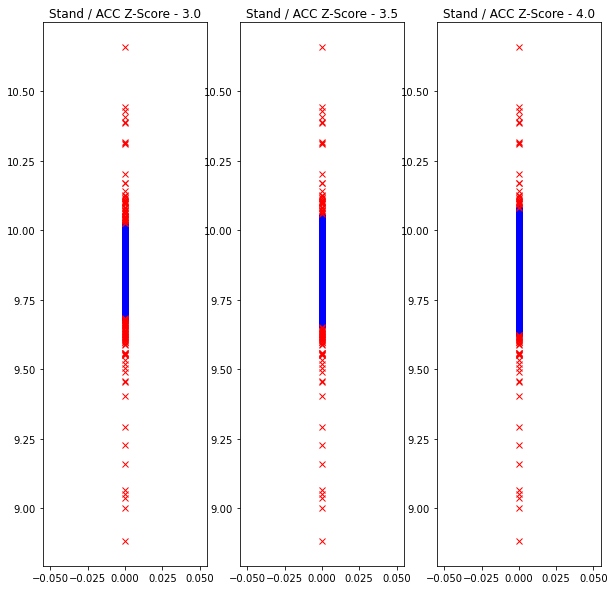

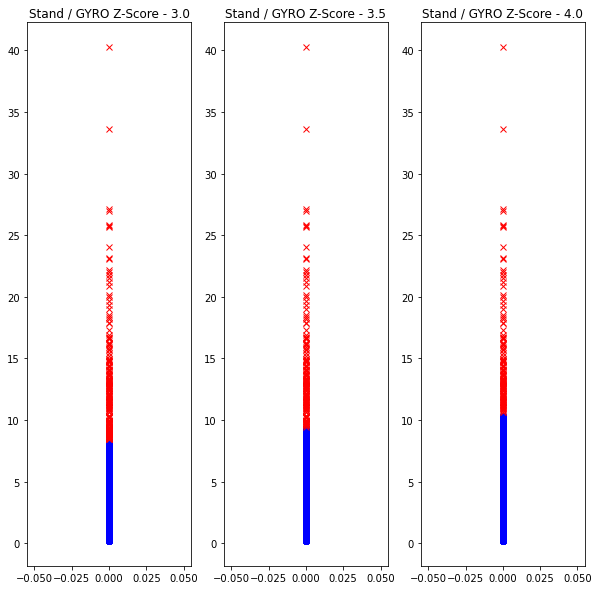

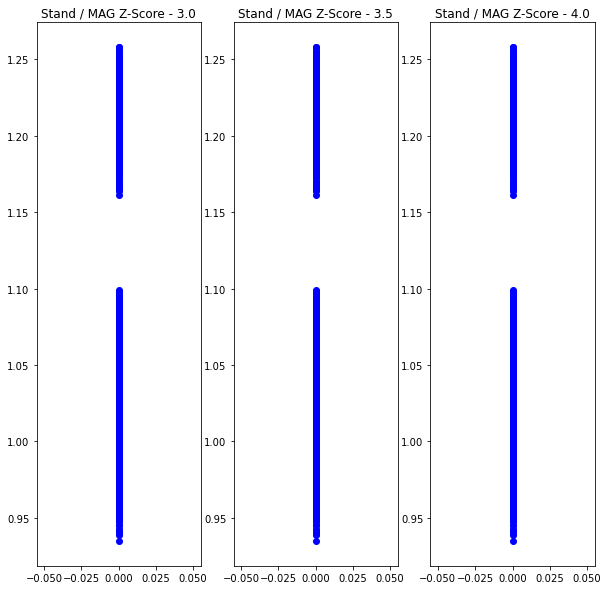

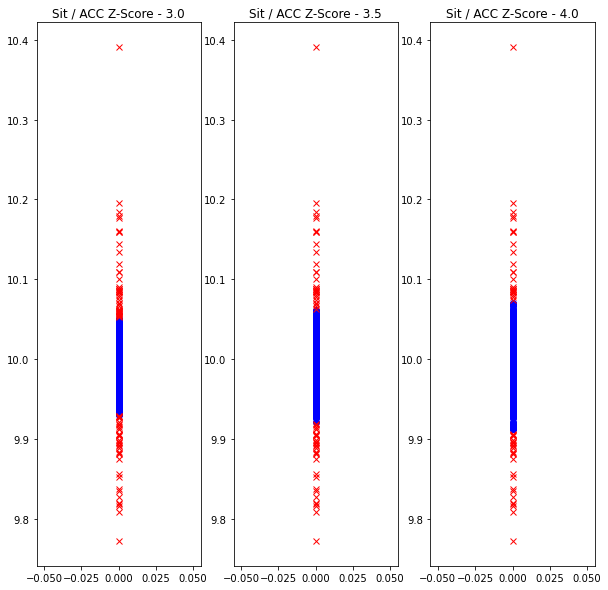

In [14]:
%matplotlib inline

density_dataFrame.rename(columns={'Density': 'Density_Q'}, inplace=True) 
how_many_plots_times_3 = 4 
show_plot = True
i = 0
for k in np.linspace(3,4,3):
    density_dataFrame["Z-Score Density_"+str(k)] = np.nan
for act in activities_labels[1:]: 
    for sen in sensors:
       
        if i+1 > how_many_plots_times_3:
            show_plot = False
        if show_plot:
            fig,ax = plt.subplots(1,3,figsize=(10,10))       
            plt.subplot(131)    
        graficos_z_score(sen,act ,transformed_data,density_dataFrame,show_plot,3.0)
        
        if show_plot:
            plt.subplot(132)
        graficos_z_score(sen,act ,transformed_data,density_dataFrame,show_plot,3.5)
        
        if show_plot:
            plt.subplot(133)
        graficos_z_score(sen,act ,transformed_data,density_dataFrame,show_plot,4.0)
        i+=1

# Ex 3.5


#### Podemos que quanto maior o k do Z-Score, menor vai ser a densidade de outliers do sinal

## Graficos e tabelas para justificar:

In [15]:
density_dataFrame

Activity Sensor  Density_Q  \
0                                               Stand    ACC   3.496186   
1                                               Stand   GYRO   7.618961   
2                                               Stand    MAG   0.000000   
3                                                 Sit    ACC   2.070469   
4                                                 Sit   GYRO   3.995641   
5                                                 Sit    MAG   0.199782   
6                                        Sit and Talk    ACC   2.860516   
7                                        Sit and Talk   GYRO   2.996731   
8                                        Sit and Talk    MAG   0.099891   
9                                                Walk    ACC   2.097712   
10                                               Walk   GYRO   0.671994   
11                                               Walk    MAG   0.009081   
12                                      Walk and Talk    ACC   1.943335   
13                                      Walk and Talk   GYRO   0.644751   
14                                      Walk and Talk    MAG   0.908100   
15                                        Climb Stair    ACC   1.725390   
16                                        Climb Stair   GYRO   0.553941   
17                                        Climb Stair    MAG   1.661823   
18                               Climb Stair and Talk    ACC   0.790047   
19                               Climb Stair and Talk   GYRO   0.299673   
20                               Climb Stair and Talk    MAG   0.399564   
21                                       Stand to Sit    ACC   0.899019   
22                                       Stand to Sit   GYRO   0.254268   
23                                       Stand to Sit    MAG   0.653832   
24                                       Sit to Stand    ACC   0.490374   
25                                       Sit to Stand   GYRO   0.426807   
26                                       Sit to Stand    MAG   0.108972   
27                              Stand to Sit and Talk    ACC   0.998910   
28                              Stand to Sit and Talk   GYRO   0.444969   
29                              Stand to Sit and Talk    MAG   0.481293   
30                              Sit to Stand and Talk    ACC   0.563022   
31                              Sit to Stand and Talk   GYRO   0.354159   
32                              Sit to Stand and Talk    MAG   0.154377   
33                                      Stand to Walk    ACC   0.099891   
34                                      Stand to Walk   GYRO   0.054486   
35                                      Stand to Walk    MAG   0.000000   
36                                      Walk to Stand    ACC   0.190701   
37                                      Walk to Stand   GYRO   0.236106   
38                                      Walk to Stand    MAG   0.000000   
39  Stand to Climb Stairs / Stand to Climb Stairs ...    ACC   0.217944   
40  Stand to Climb Stairs / Stand to Climb Stairs ...   GYRO   0.000000   
41  Stand to Climb Stairs / Stand to Climb Stairs ...    MAG   0.000000   
42                               Climb Stairs to Walk    ACC   0.099891   
43                               Climb Stairs to Walk   GYRO   0.000000   
44                               Climb Stairs to Walk    MAG   0.063567   
45             Climb Stairs and Talk to Walk and Talk    ACC   0.009081   
46             Climb Stairs and Talk to Walk and Talk   GYRO   0.000000   
47             Climb Stairs and Talk to Walk and Talk    MAG   0.009081   

    Z-Score Density_3.0  Z-Score Density_3.5  Z-Score Density_4.0  
0              1.044315             0.744642             0.581184  
1              1.888849             1.443879             1.162368  
2              0.000000             0.000000             0.000000  
3              1.458333             1.076389             0.920139  
4              1.163194      

In [16]:
# Simplesmente para ajudar no x label dos plots
density_dataFrame["x_label_aux"] = density_dataFrame["Activity"] + " - " + density_dataFrame["Sensor"]

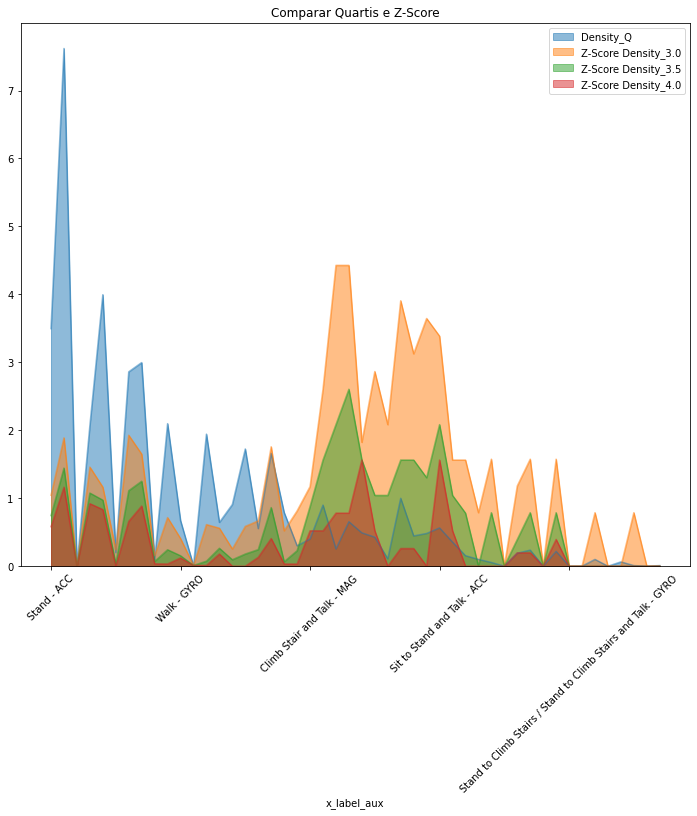

In [17]:
density_dataFrame.plot.area(figsize=(12, 10), stacked=False, x="x_label_aux")
plt.title("Comparar Quartis e Z-Score")
plt.xticks(rotation=45)
plt.show()

## Comparar os resultados do 3.1 com o 3.4
<p>Pelo que podemos confluir pela visualização dos nossos resultados no gráfico em cima e na tabela, a densidade de outliers pelos quartis é bastante superior em todos os sensores nas atividades de Stand, Sit, Sit and Talk	 ,Walk, Walk and Talk e Climb Stair. Depois nas restantes, o Z-Score de k=3 já tem maior densidade de outliers. Chegando a haver atividade como Stand to Climb Stairs / Stand to Climb Stairs em que a densidade calculada pelos quartis é inferior de todos os Z-Scores de k=3 até k=4.	</p>

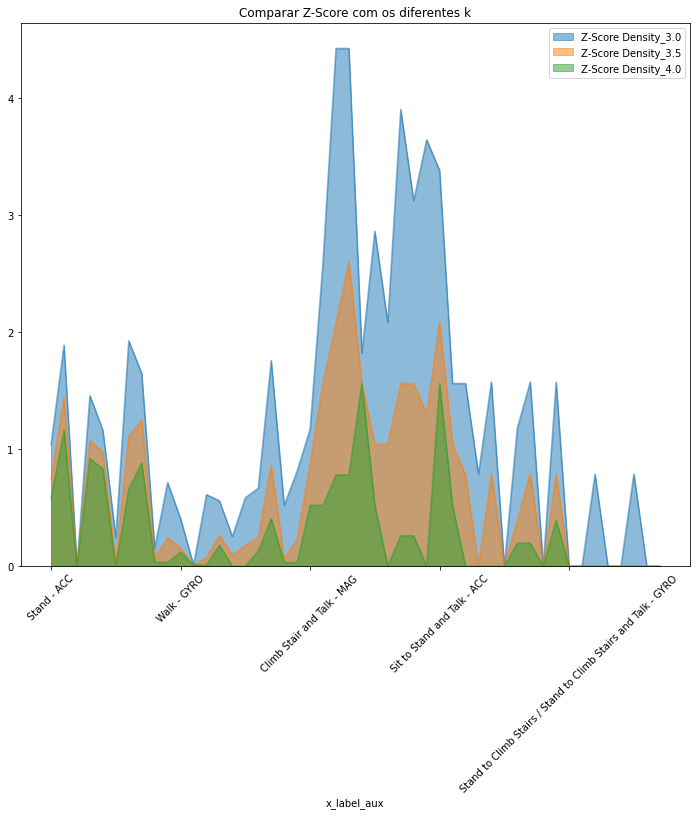

In [18]:
density_dataFrame[['x_label_aux', 'Z-Score Density_3.0', 'Z-Score Density_3.5', 'Z-Score Density_4.0']].plot.area(figsize=(12, 10), stacked=False, x="x_label_aux")
plt.title("Comparar Z-Score com os diferentes k")
plt.xticks(rotation=45)
plt.show()

## Comparar os Z-Scores entre si
<p>Pelo gráfico em cima podemos concuir o que já seria de esperar, que é: quando maior o K do Z-Score, menor a densidade de outliers. Uma vez que estamos a aumentar a distância à origem da distribuição Gaussina em que consideramos que os pontos não são ouliers, como podemos ver na imagem em baixo.</p>
<img src="z-score.png" width=600 height=600 />


# Ex 3.6

In [19]:
# Apenas para poder mexer nos gráficos 3D
%matplotlib notebook

In [20]:
# Implementação feita com recurso a um import

def k_means(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    return kmeans.fit_predict(data)

In [21]:
# Implementação feita por nós

def k_mean_by_us(data, n_clusters, max_iterations):
    # Calcula a distância entre os pontos aos centros dos clusters
    def calculate_distance(data,centroids):   
        data_2_manipulate = data[data.columns[:-1]].values
        all_clusters = []
        for index,row in enumerate(data_2_manipulate):
            distance = [np.linalg.norm(row - centroid) for centroid in centroids]
            cluster = distance.index(min(distance))
            all_clusters.append(cluster)
        data["centroids"] = all_clusters            
        return data
    
    # Atualiza o centro dos clusters
    def centroids_new_positions(data, n_clusters):
        list_clusters = []
        for i in range(n_clusters):
            list_clusters.append(data[data["centroids"] == i].mean().values[:-1])
        return list_clusters
    
    # Recursividade
    def recursive_kMeans(data, n_clusters, max_iterations, curr_iteration, list_clusters):
        prev_list_clusters = list_clusters
        data = calculate_distance(data, list_clusters)
        list_clusters = centroids_new_positions(data, n_clusters)
        if str(prev_list_clusters) == str(list_clusters) or curr_iteration > max_iterations:
            return data
        return recursive_kMeans(data, n_clusters, max_iterations, curr_iteration + 1, list_clusters)
    
    # Preparar dados para o algoritmo
    data["centroids"] = -1
    clusters_start_index = random.choices(data.index, k=n_clusters)
    list_clusters = []
    for clust in clusters_start_index:
        coordinates = np.array([data.loc[clust]["ACC_X"], data.loc[clust]["ACC_Y"], data.loc[clust]["ACC_Z"]])
        list_clusters.append(coordinates)
    
        
    return recursive_kMeans(data, n_clusters, max_iterations, 0, list_clusters)["centroids"]

# Ex 3.7

In [22]:
upper_limits_n_clusters = 5
for act in activities_labels[1:]:
    for sen in sensors:
        for n_clusters in range(2,upper_limits_n_clusters+1):
              transformed_data[act][sen+"_k_means_"+str(n_clusters)] = k_means(transformed_data[act][[sen]],n_clusters)

In [ ]:
n_clusters = 6
for act in activities:
    data_to_clusterise = data[data["ACT_LABEL"] == act][["ACC_X","ACC_Y","ACC_Z"]]
    
    #data_to_clusterise["clusters"] = k_means(data_to_clusterise,n_clusters)
    #k_mean_by_us(data_to_clusterise,n_clusters,100)
    data_to_clusterise["clusters"] = k_mean_by_us(data_to_clusterise,n_clusters,100)
    
    fig = plt.figure(figsize=(8,6)).gca(projection='3d')
    fig.scatter(data_to_clusterise.ACC_X, data_to_clusterise.ACC_Y, data_to_clusterise.ACC_Z, c = data_to_clusterise.clusters)
    fig.set_xlabel('ACC_X')
    fig.set_ylabel('ACC_Y')
    fig.set_zlabel('ACC_Z')
    plt.show()
    break
#my_data

# Ex 3.7 Algoritmo DBSCAN

In [ ]:
def calculate_and_show_dbscan(data, eps, min_samples, sensor, act):
    data_to_clusterise = data[data["ACT_LABEL"] == act][[sensor + "_X", sensor + "_Y", sensor + "_Z"]]
    data_to_clusterise["clusters"] = dbscan(data_to_clusterise, eps=eps, min_samples=min_samples)[1]
    fig = plt.figure(figsize=(8, 6)).gca(projection='3d')
    plt.title(activities_labels[act] + " / " + sensor)
    if sensor == "ACC":
        fig.scatter(data_to_clusterise.ACC_X, data_to_clusterise.ACC_Y, data_to_clusterise.ACC_Z, c=data_to_clusterise.clusters)
        fig.set_xlabel('ACC_X')
        fig.set_ylabel('ACC_Y')
        fig.set_zlabel('ACC_Z')
    elif sensor == "GYRO":
        fig.scatter(data_to_clusterise.GYRO_X, data_to_clusterise.GYRO_Y, data_to_clusterise.GYRO_Z, c=data_to_clusterise.clusters)
        fig.set_xlabel('GYRO_X')
        fig.set_ylabel('GYRO_Y')
        fig.set_zlabel('GYRO_Z')
    elif sensor == "MAG":
        fig.scatter(data_to_clusterise.MAG_X, data_to_clusterise.MAG_Y, data_to_clusterise.MAG_Z, c=data_to_clusterise.clusters)
        fig.set_xlabel('MAG_X')
        fig.set_ylabel('MAG_Y')
        fig.set_zlabel('MAG_Z')
    plt.show()

<IPython.core.display.Javascript object>


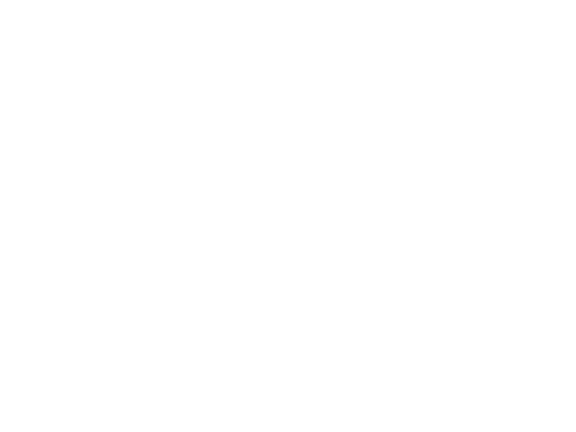

<IPython.core.display.Javascript object>


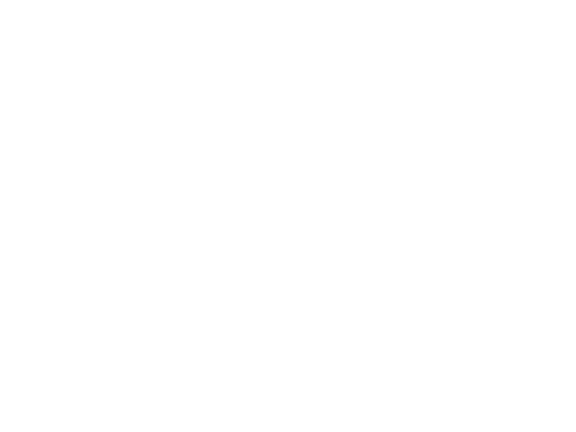

<IPython.core.display.Javascript object>


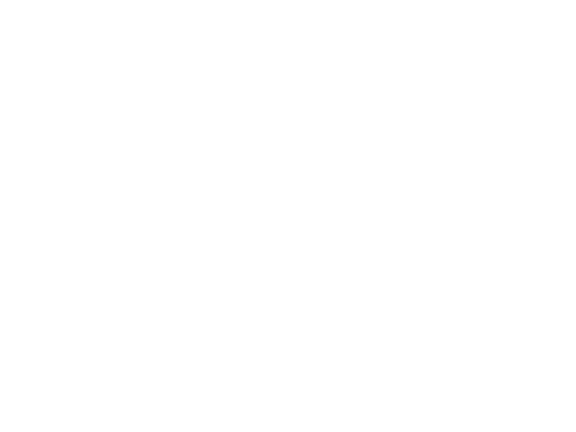

<IPython.core.display.Javascript object>


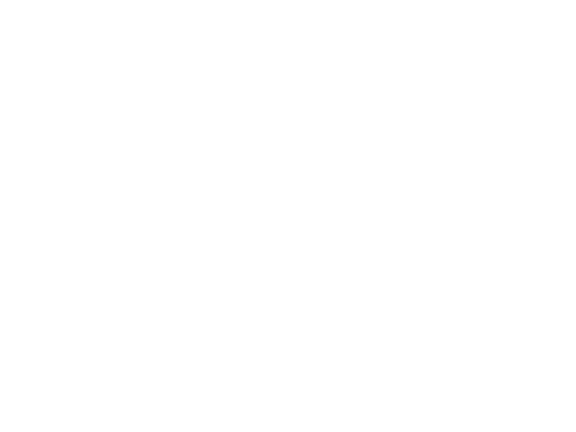

<IPython.core.display.Javascript object>


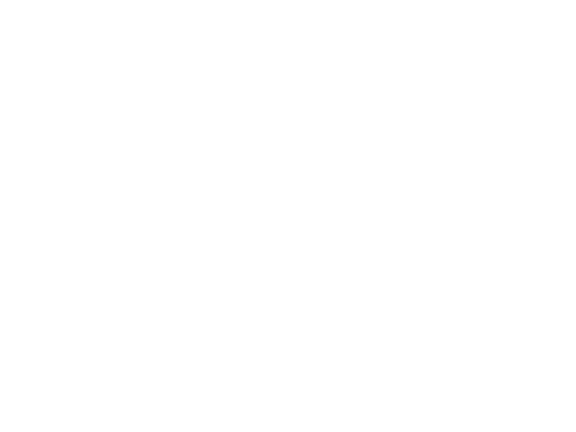

<IPython.core.display.Javascript object>


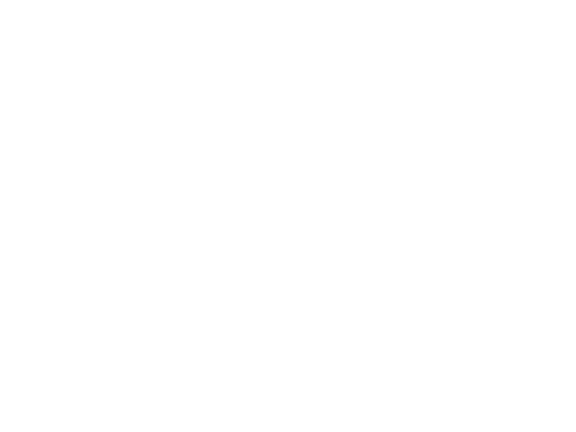

<IPython.core.display.Javascript object>


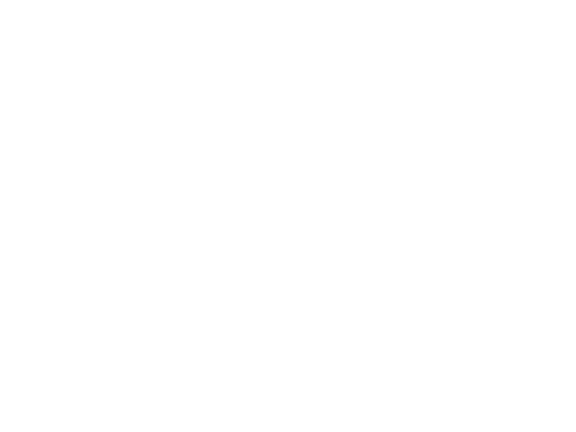

<IPython.core.display.Javascript object>


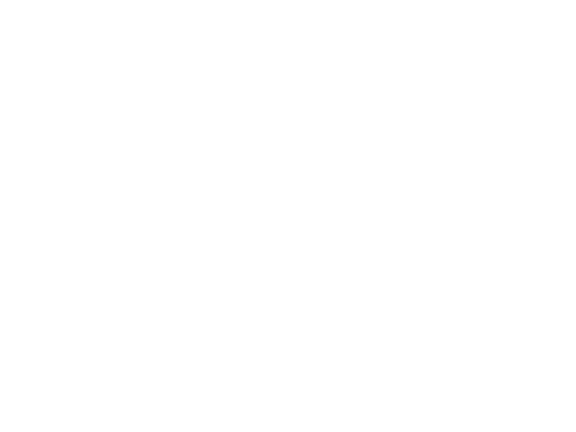

<IPython.core.display.Javascript object>


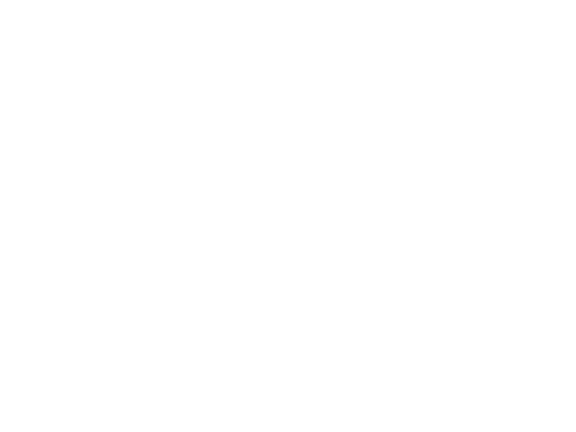

<IPython.core.display.Javascript object>


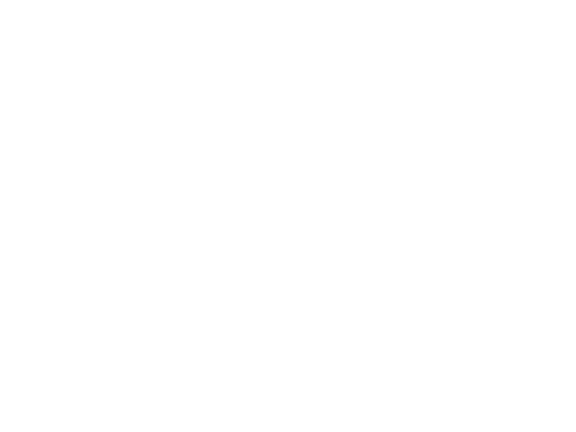

<IPython.core.display.Javascript object>


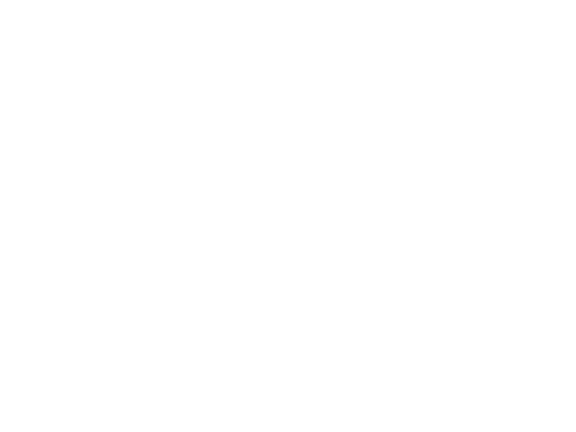

<IPython.core.display.Javascript object>


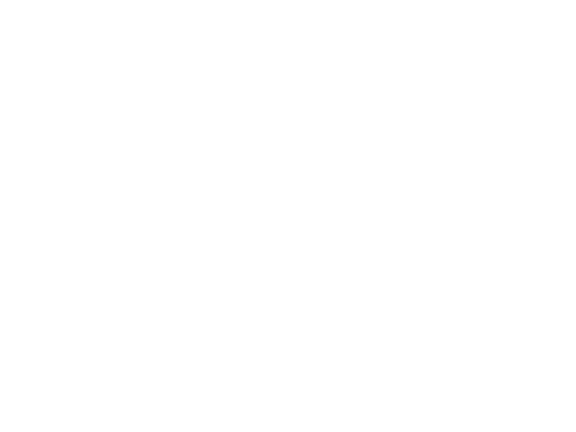

<IPython.core.display.Javascript object>


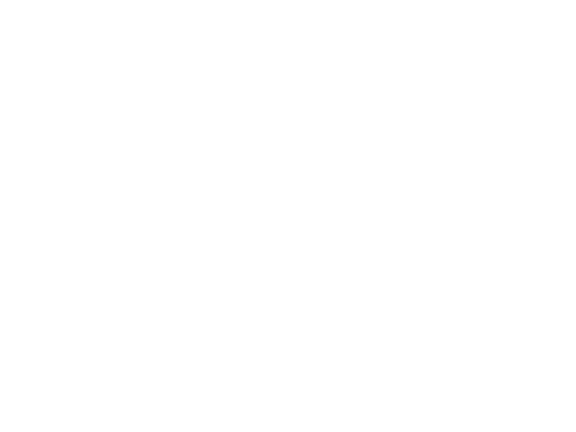

<IPython.core.display.Javascript object>


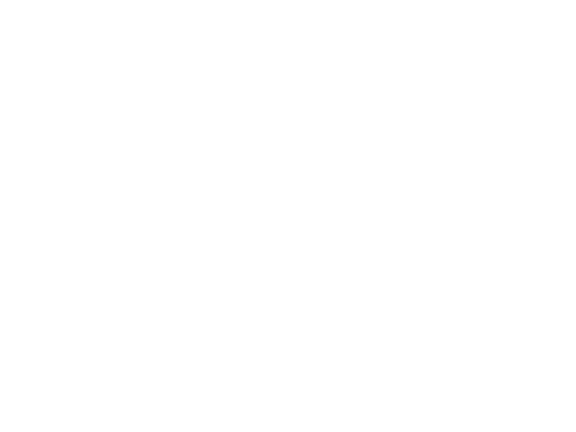

<IPython.core.display.Javascript object>


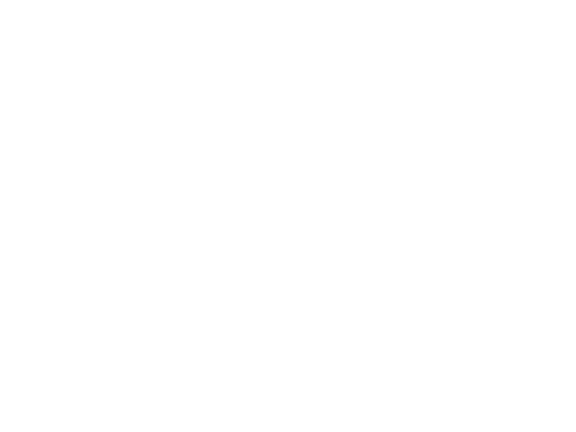

<IPython.core.display.Javascript object>


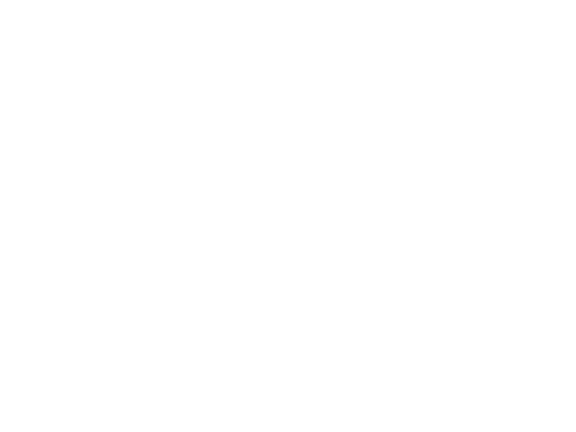

<IPython.core.display.Javascript object>


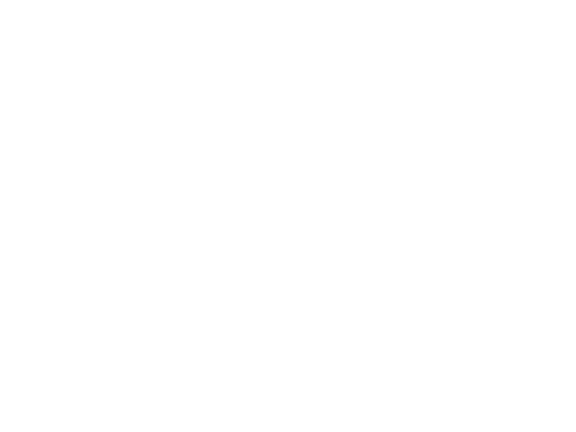

<IPython.core.display.Javascript object>


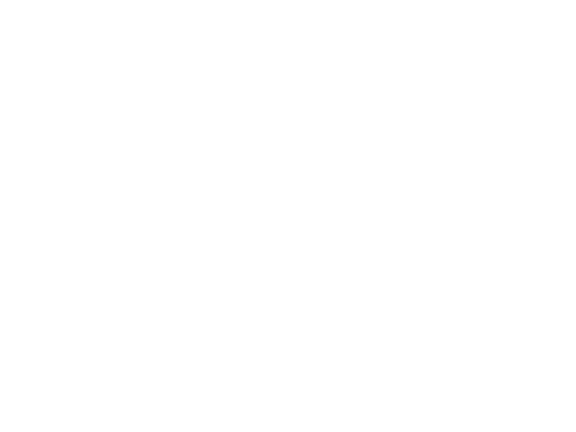

<IPython.core.display.Javascript object>


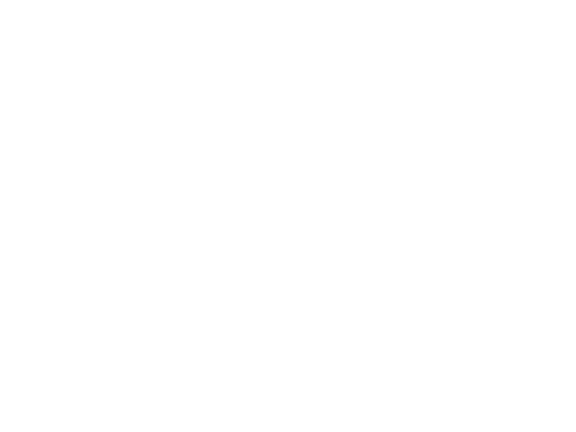

<IPython.core.display.Javascript object>


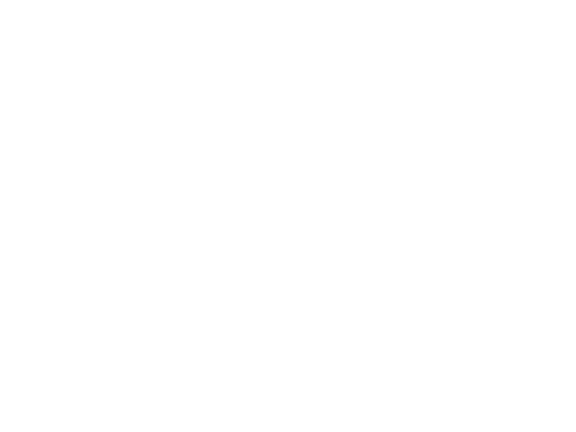

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


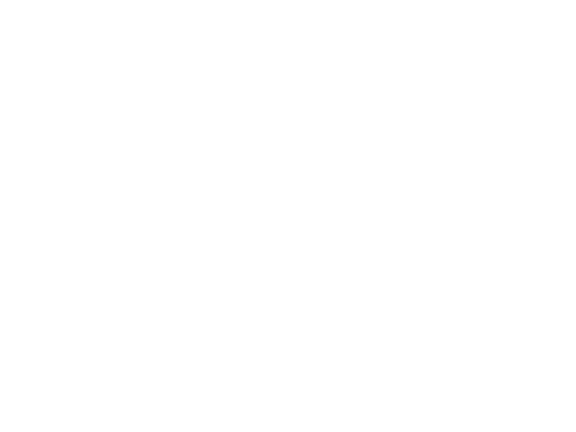

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


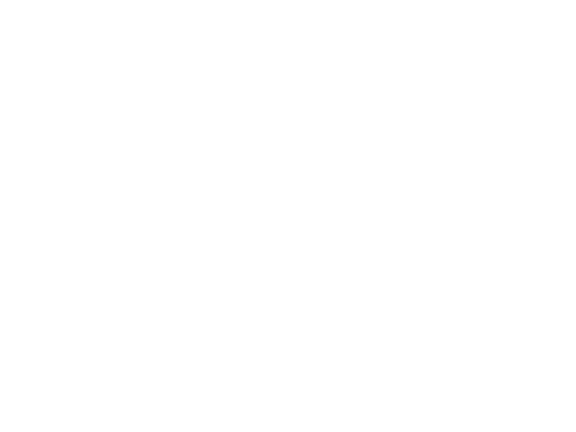

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


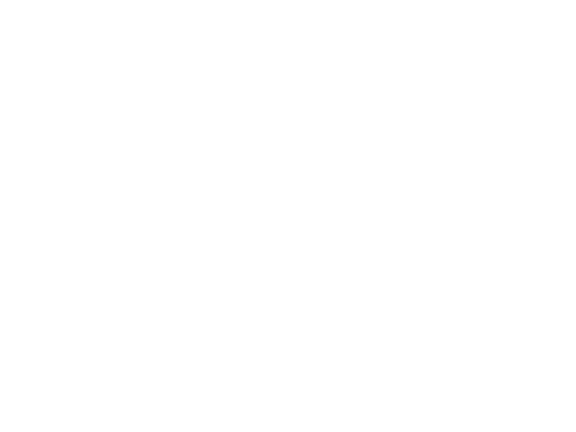

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


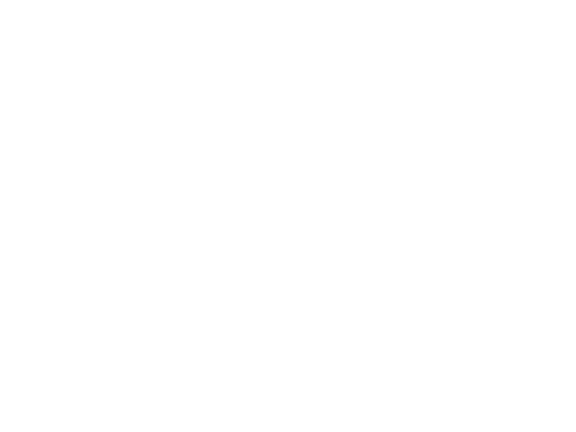

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


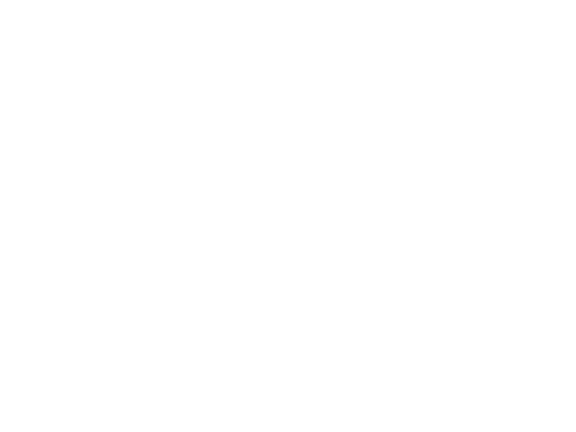

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


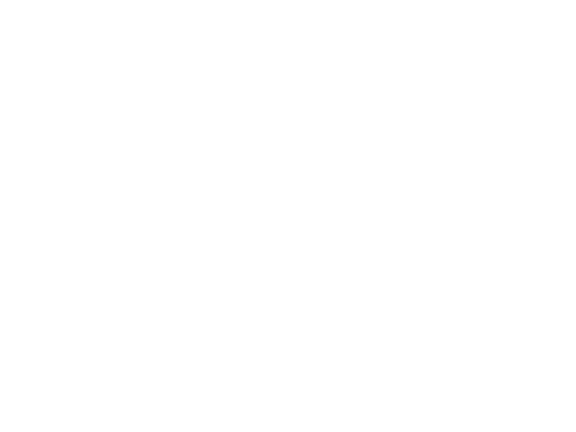

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


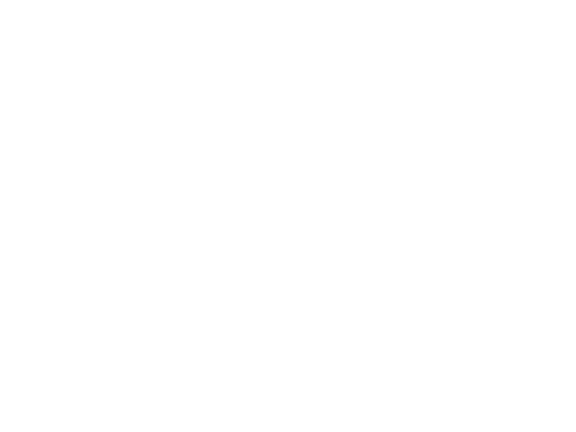

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


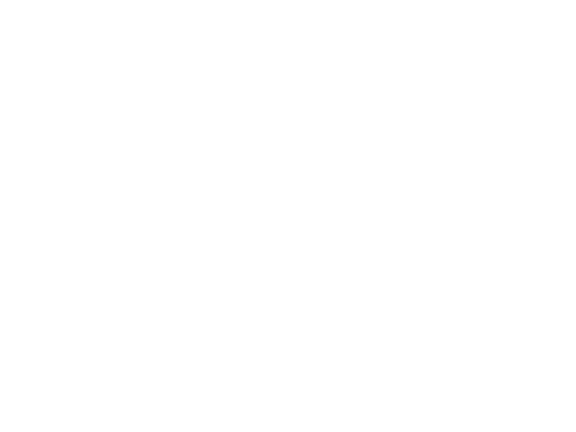

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


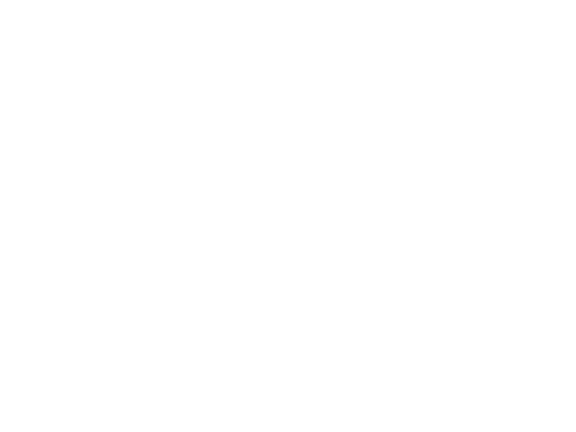

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


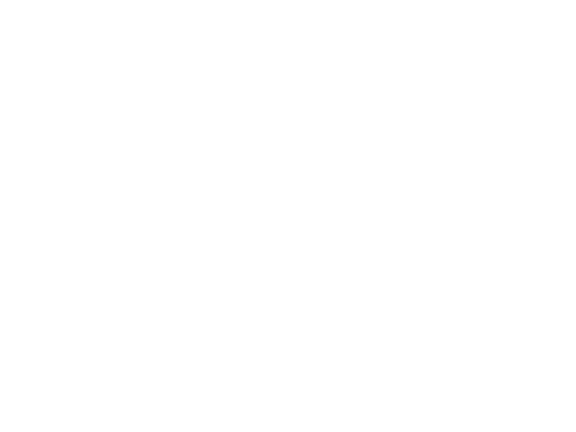

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


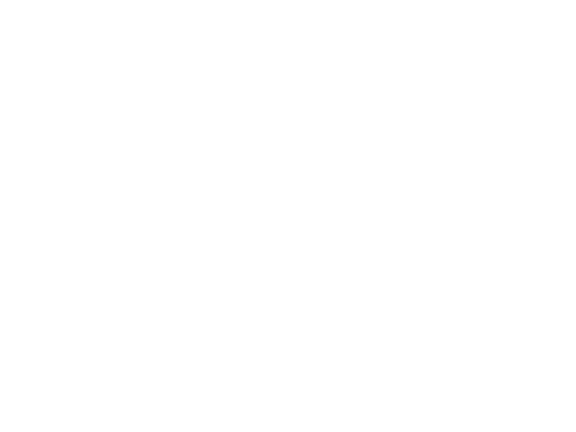

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


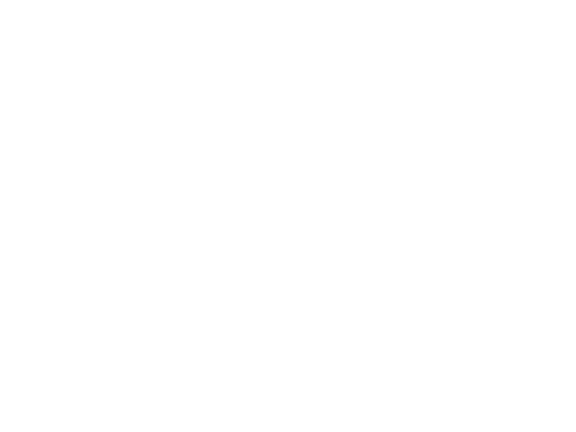

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


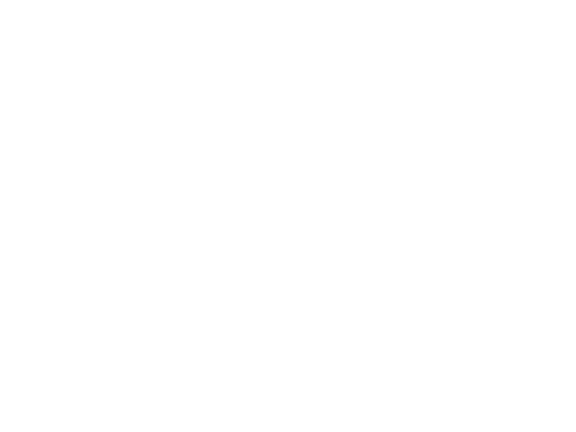

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


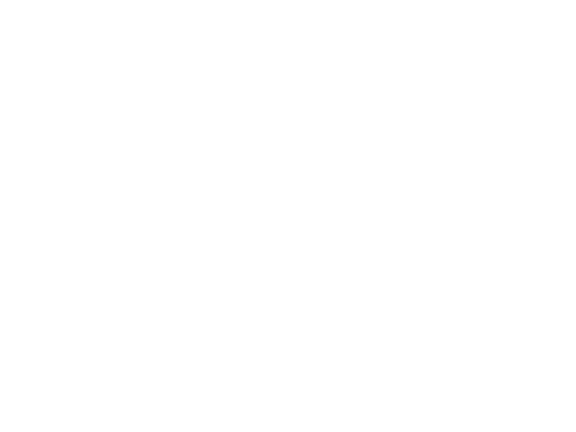

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


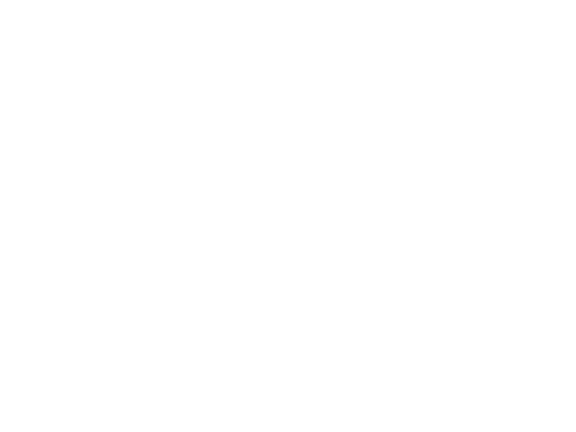

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


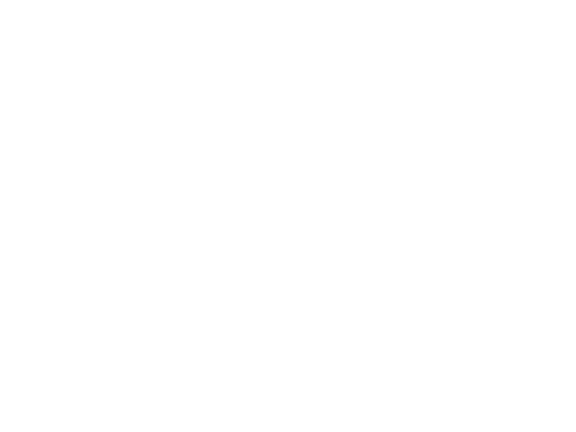

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


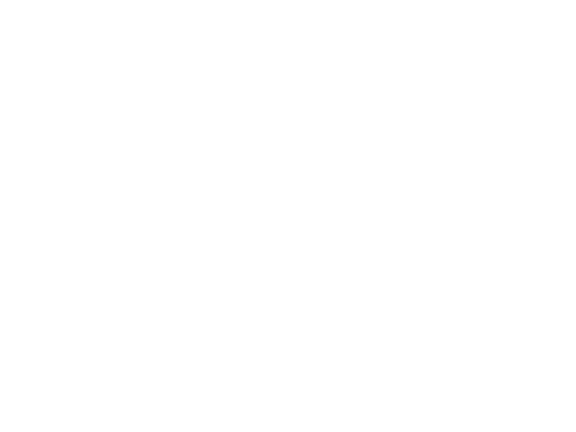

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


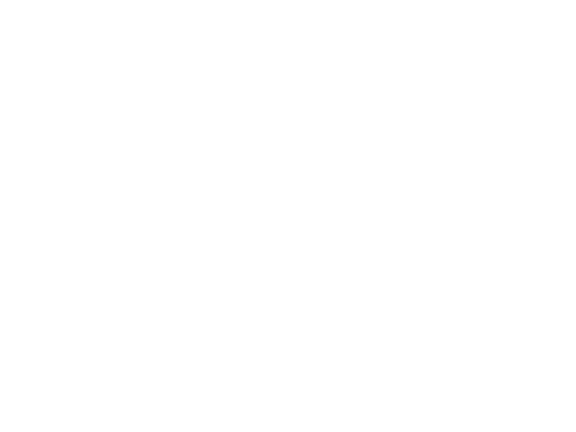

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


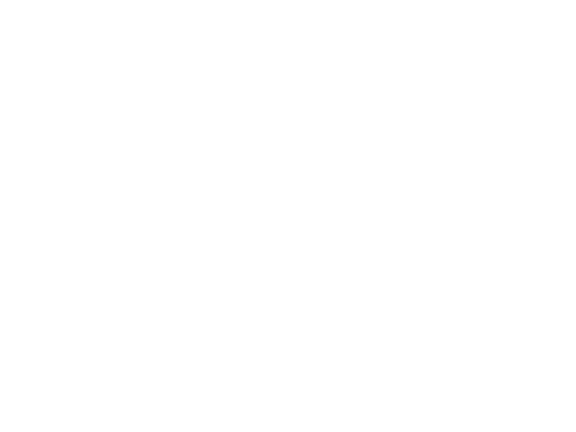

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


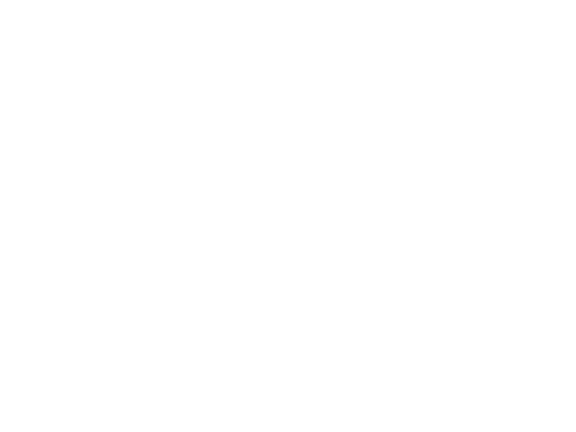

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


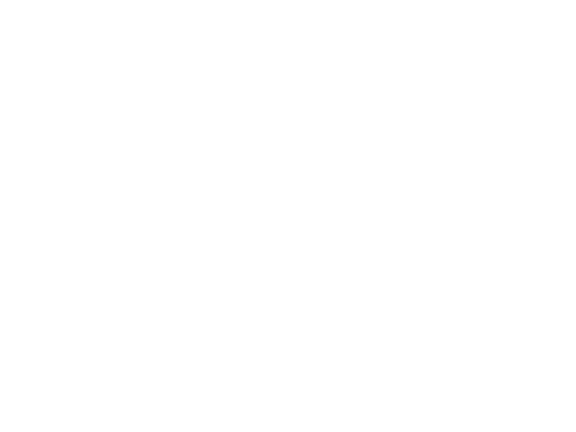

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


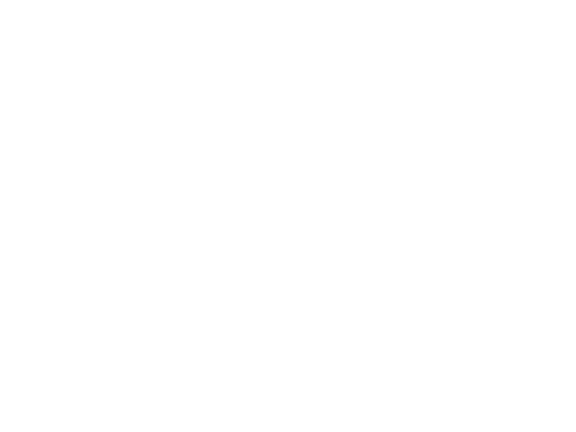

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


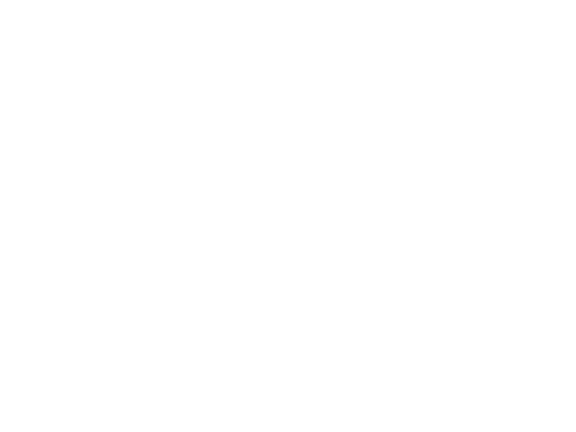

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


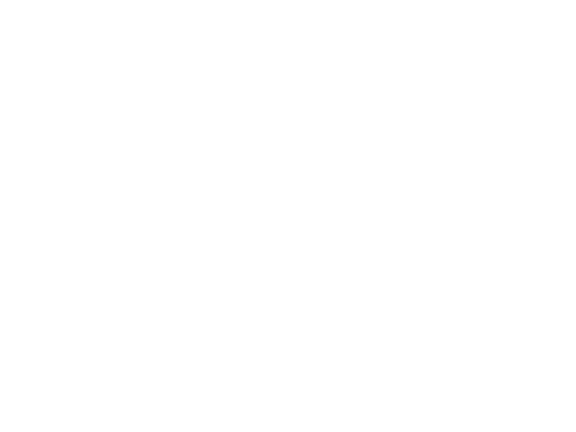

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


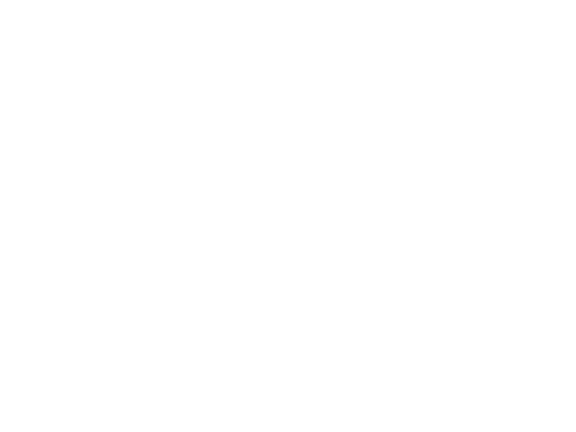

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


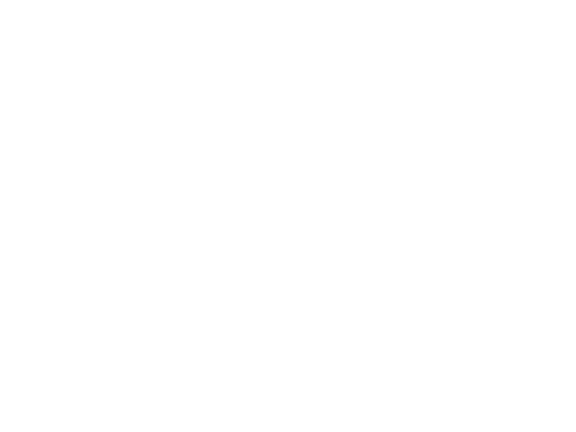

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


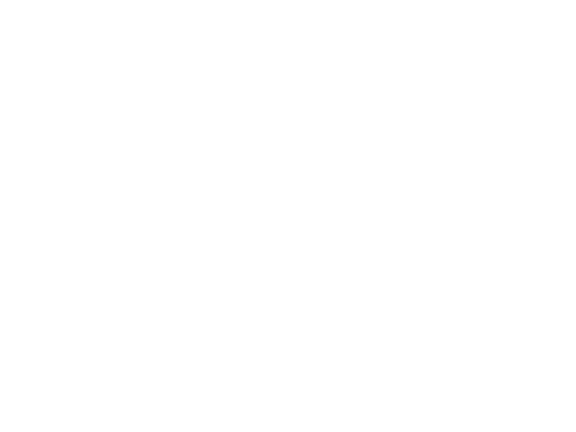

<ipython-input-24-8e19e0442448>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 6)).gca(projection='3d')


<IPython.core.display.Javascript object>


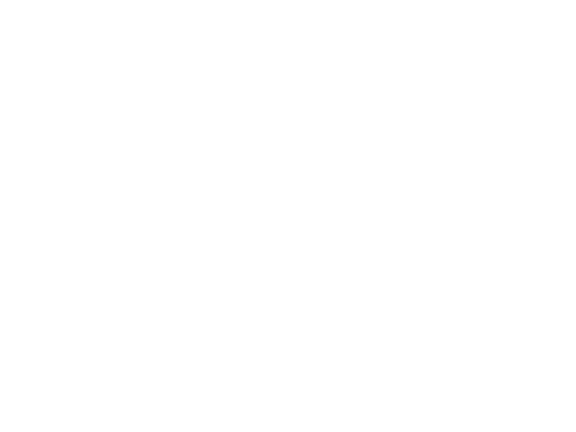

<IPython.core.display.Javascript object>


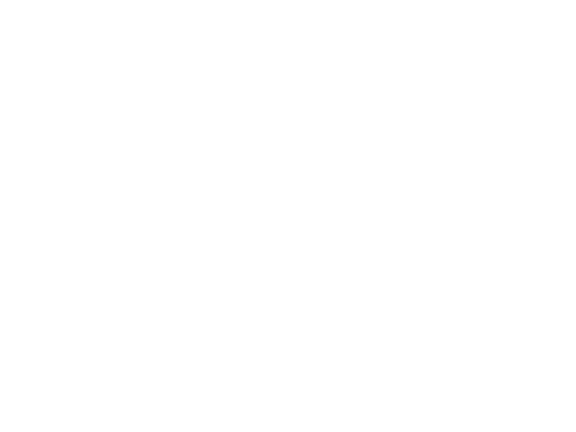

<IPython.core.display.Javascript object>


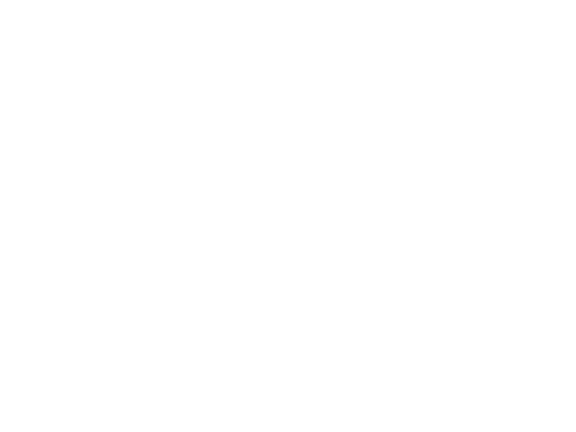

<IPython.core.display.Javascript object>


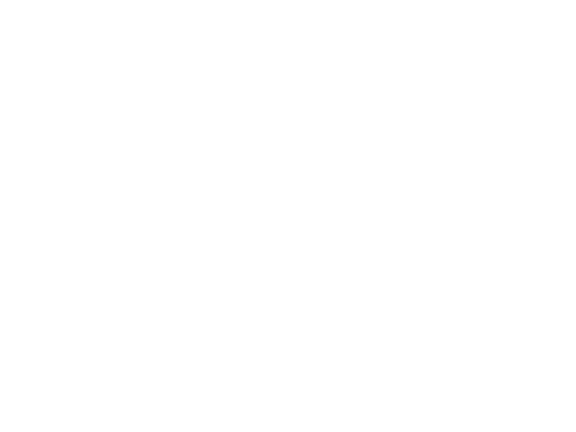

<IPython.core.display.Javascript object>


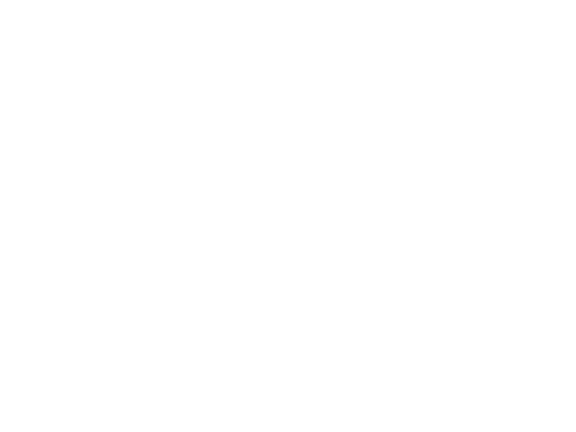

<IPython.core.display.Javascript object>


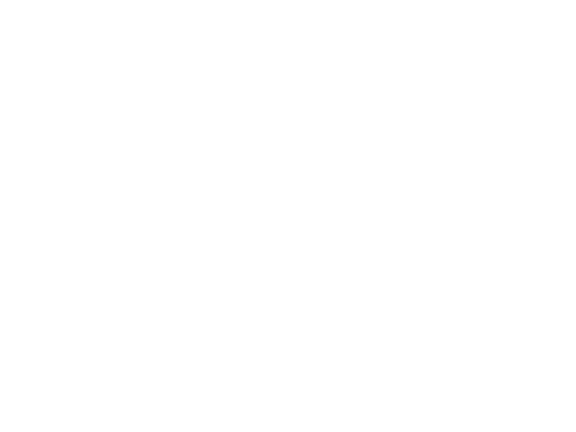

<IPython.core.display.Javascript object>


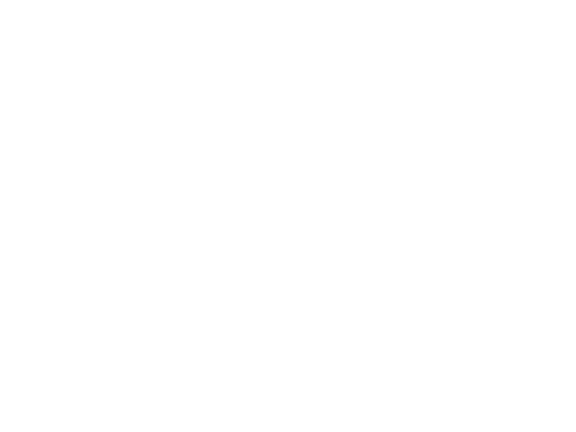

<IPython.core.display.Javascript object>


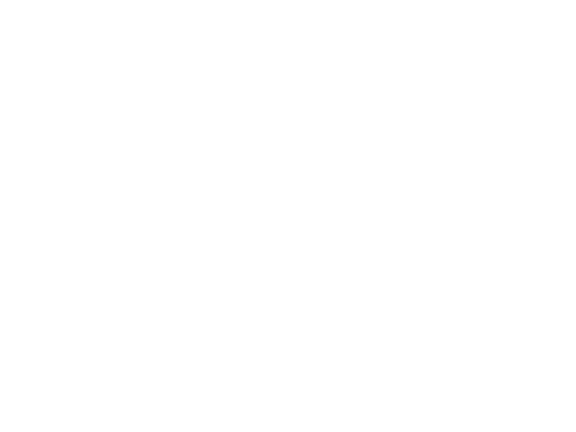

<IPython.core.display.Javascript object>


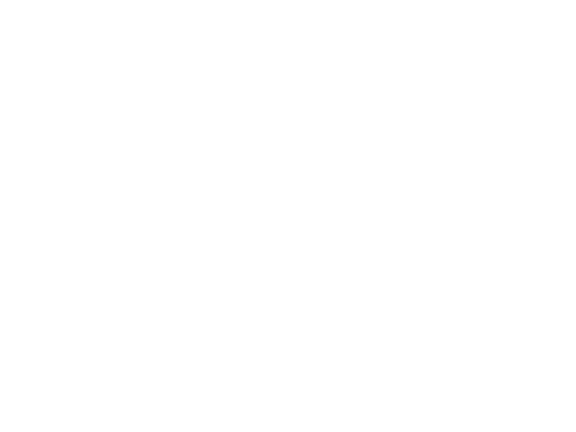

<IPython.core.display.Javascript object>


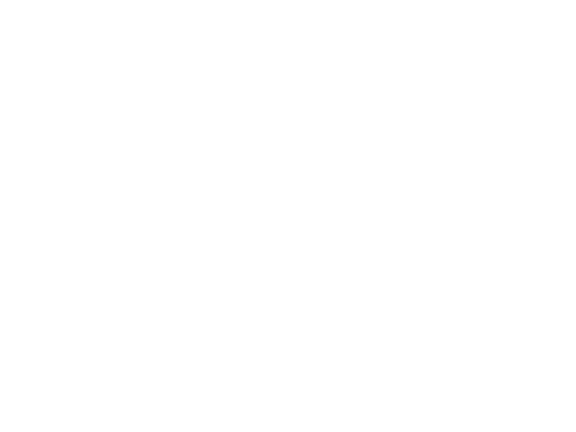

<IPython.core.display.Javascript object>


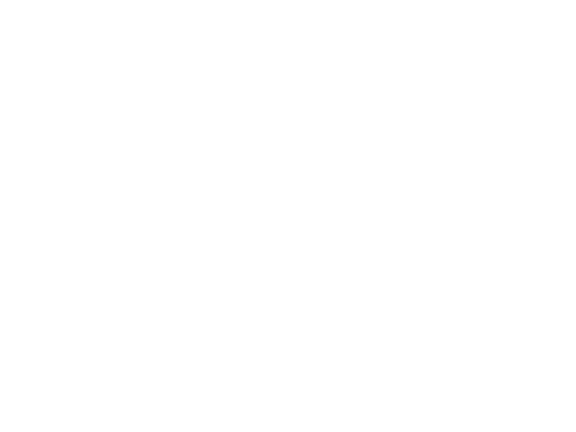

<IPython.core.display.Javascript object>


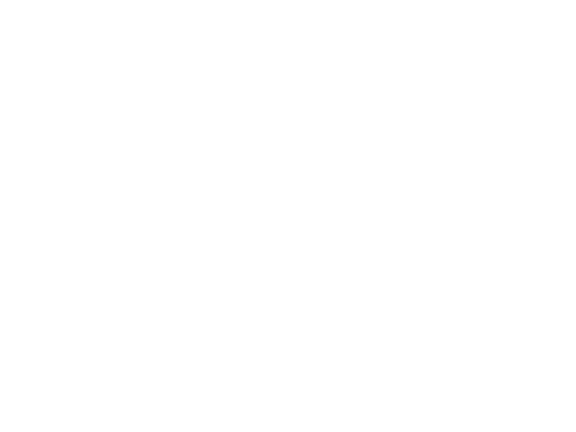

<IPython.core.display.Javascript object>


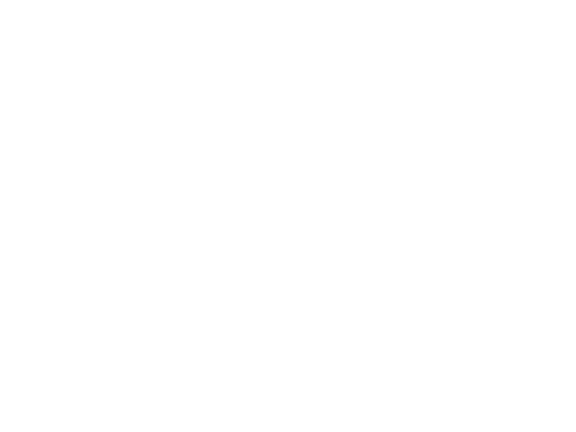

<IPython.core.display.Javascript object>


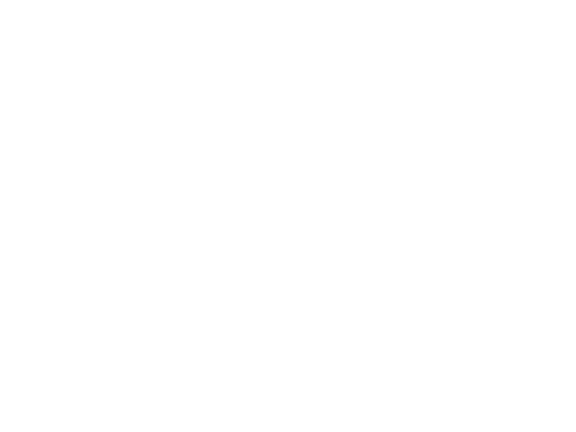

<IPython.core.display.Javascript object>


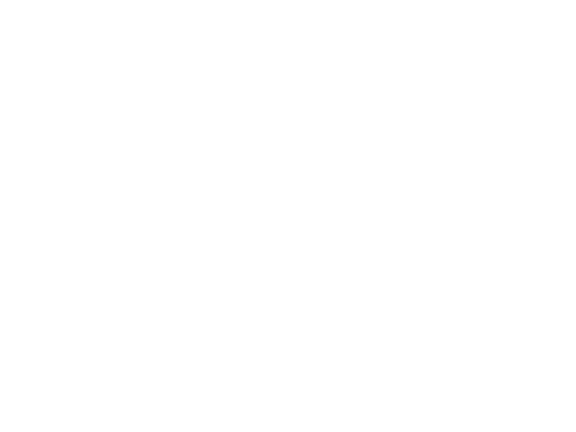

<IPython.core.display.Javascript object>


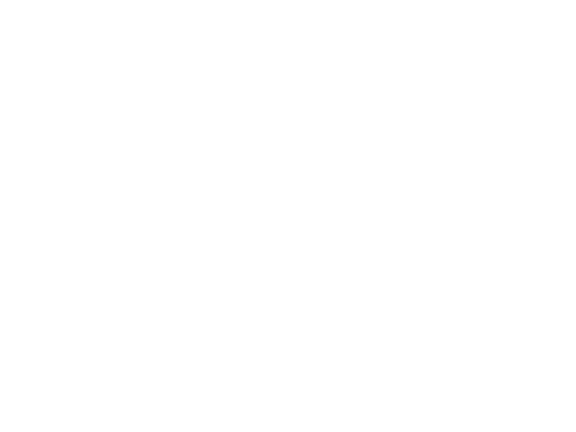

<IPython.core.display.Javascript object>


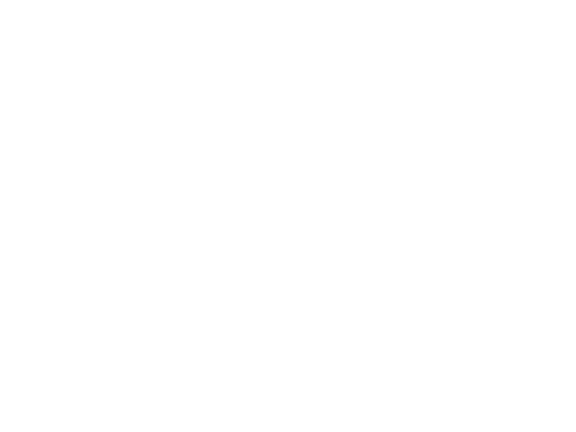

<IPython.core.display.Javascript object>


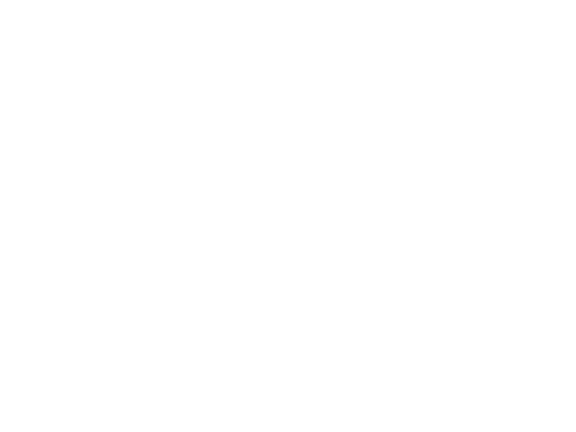

<IPython.core.display.Javascript object>


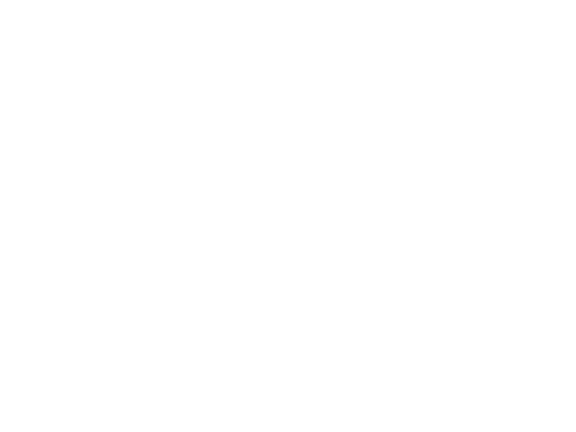

<IPython.core.display.Javascript object>


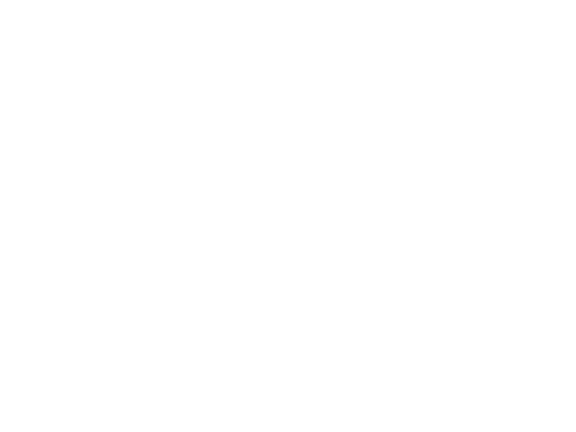

<IPython.core.display.Javascript object>


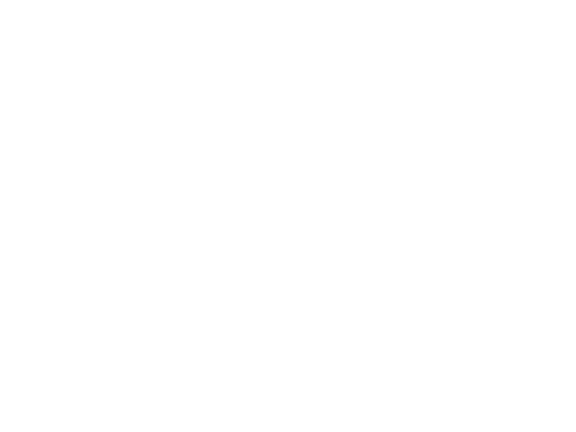

<IPython.core.display.Javascript object>


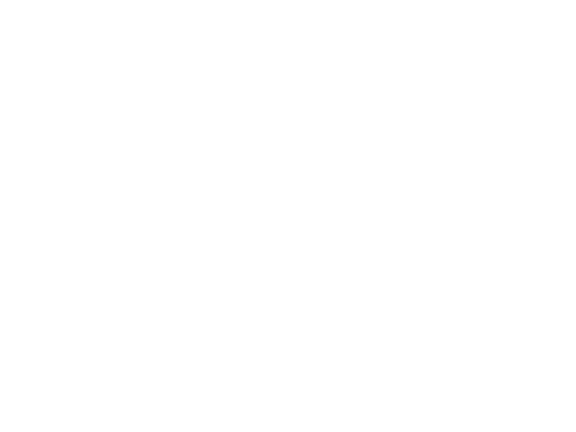

<IPython.core.display.Javascript object>


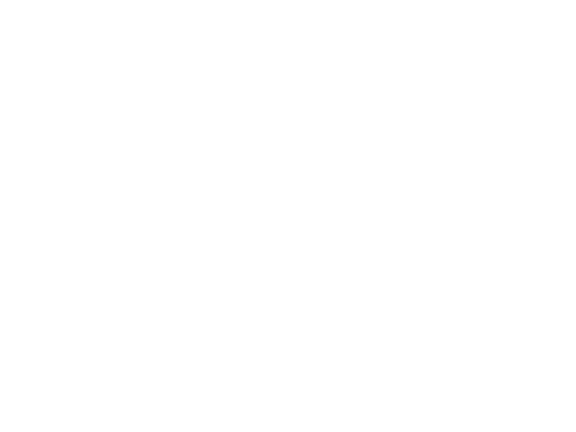

<IPython.core.display.Javascript object>


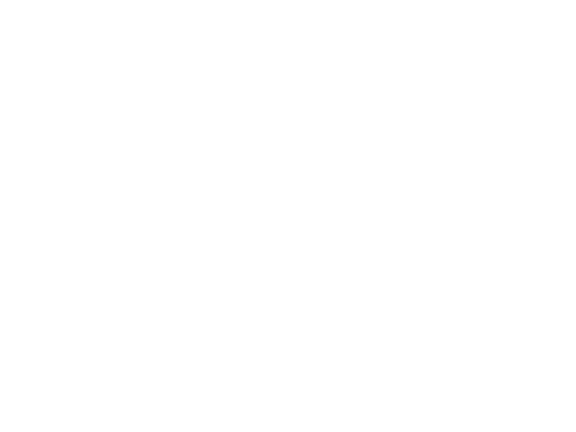

<IPython.core.display.Javascript object>


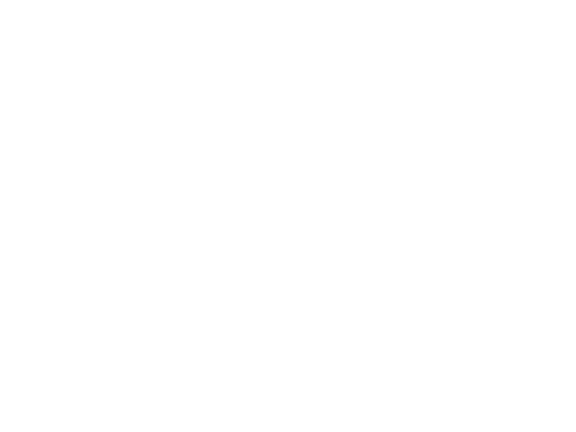

<IPython.core.display.Javascript object>


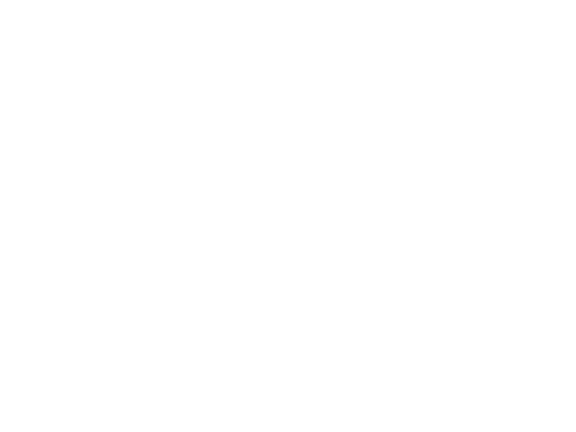

<IPython.core.display.Javascript object>


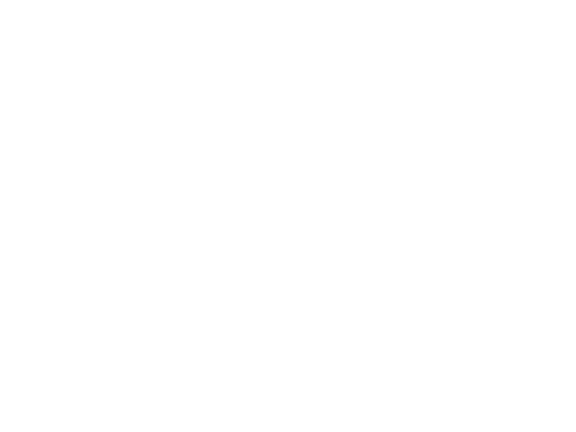

<IPython.core.display.Javascript object>


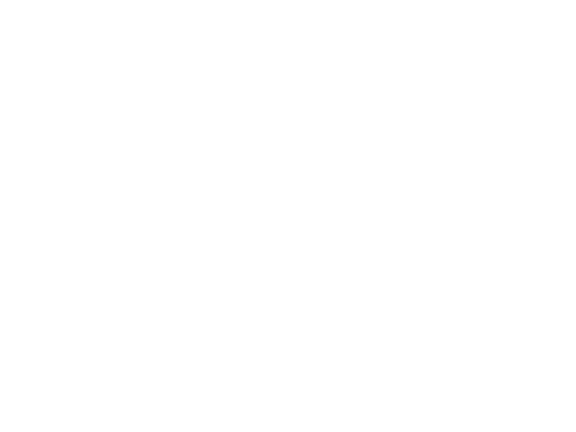

<IPython.core.display.Javascript object>


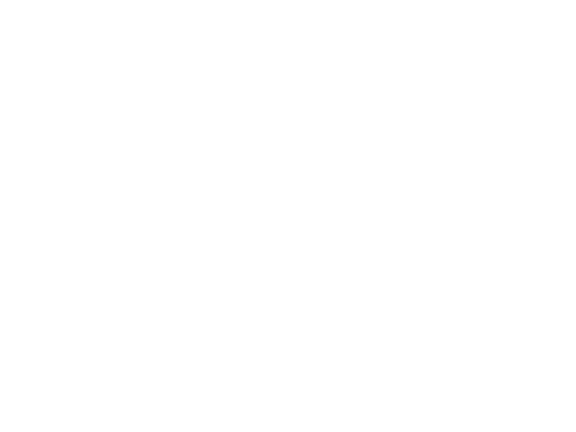

<IPython.core.display.Javascript object>


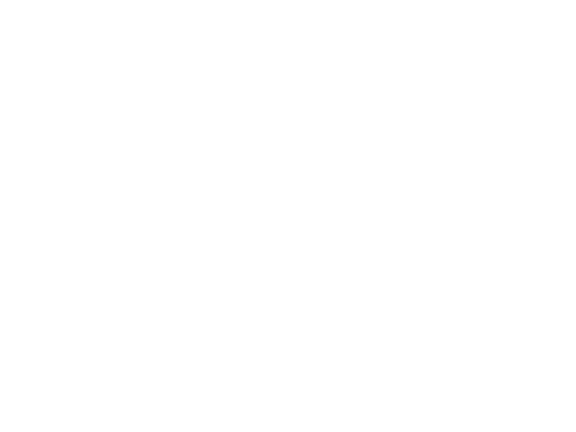

<IPython.core.display.Javascript object>


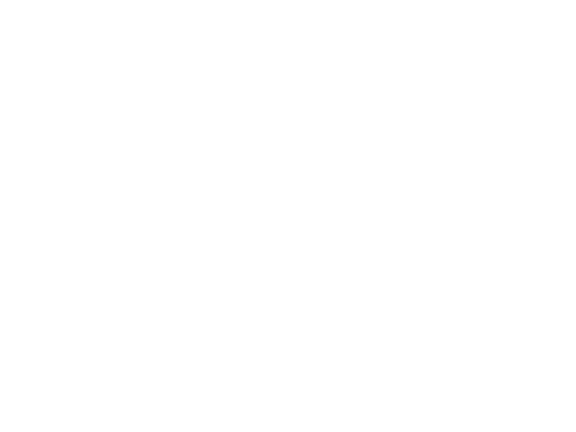

<IPython.core.display.Javascript object>


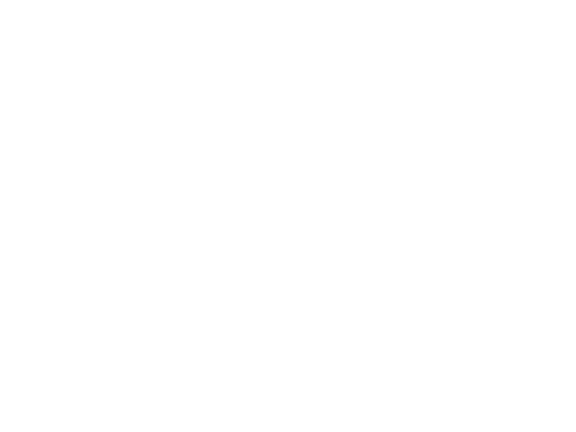

<IPython.core.display.Javascript object>


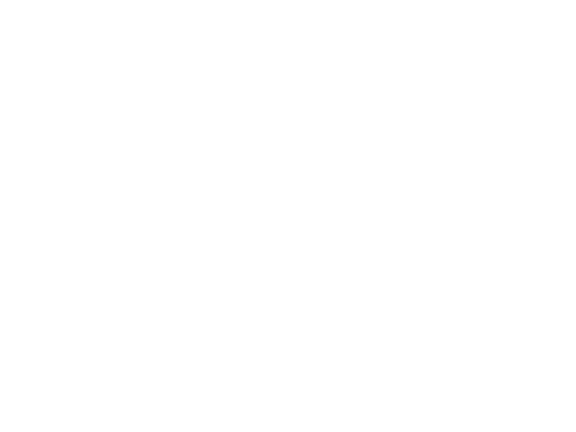

<IPython.core.display.Javascript object>


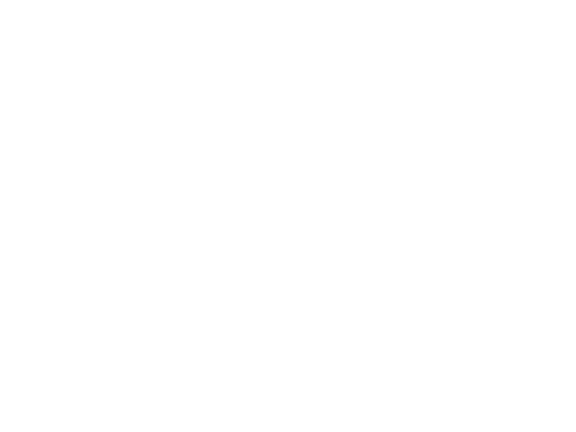

<IPython.core.display.Javascript object>


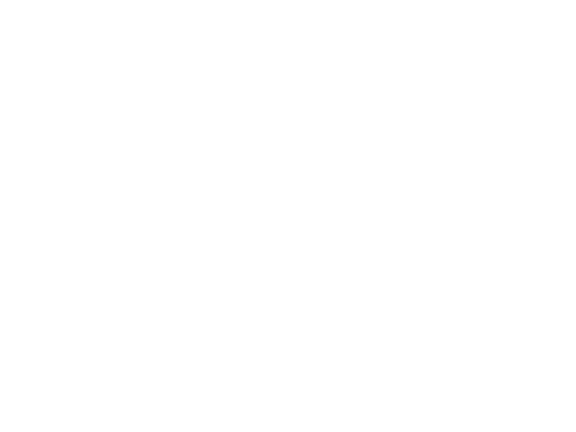

<IPython.core.display.Javascript object>


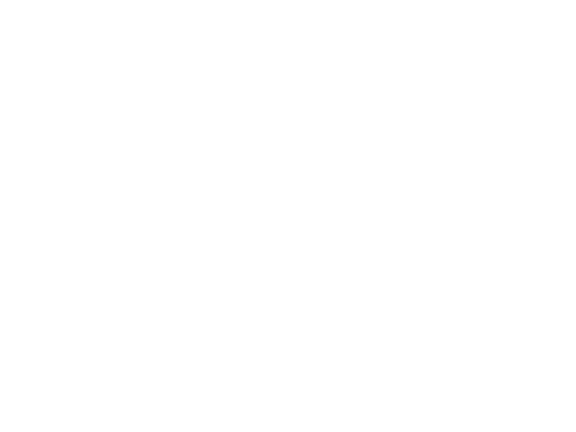

<IPython.core.display.Javascript object>


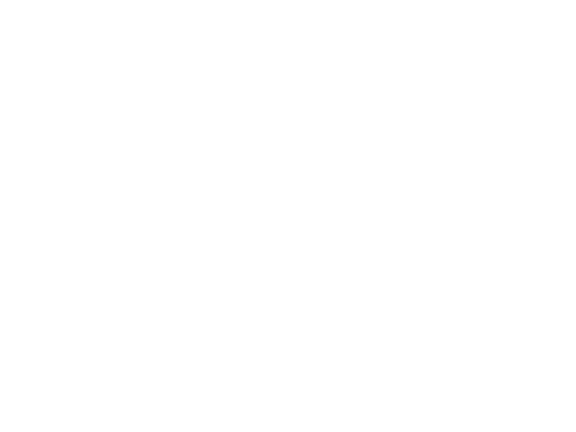

<IPython.core.display.Javascript object>


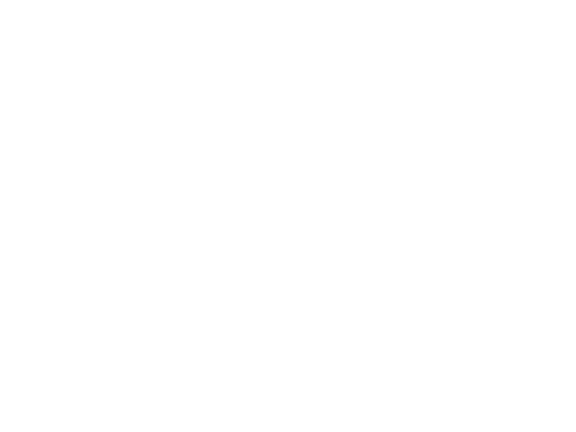

<IPython.core.display.Javascript object>


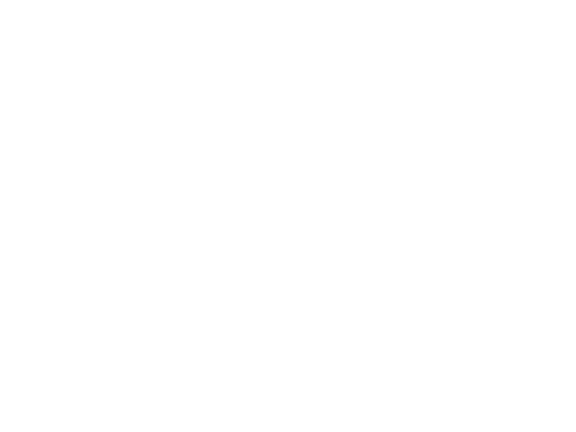

<IPython.core.display.Javascript object>


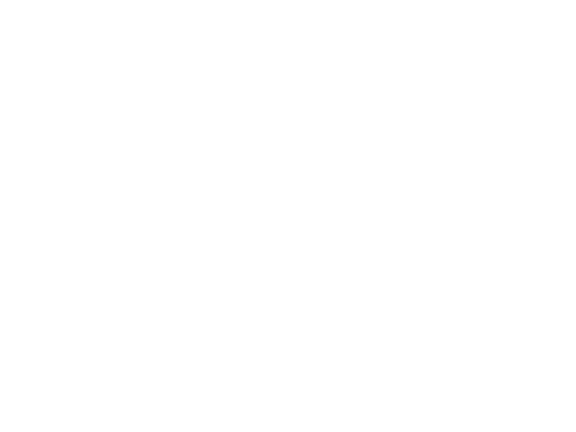

<IPython.core.display.Javascript object>


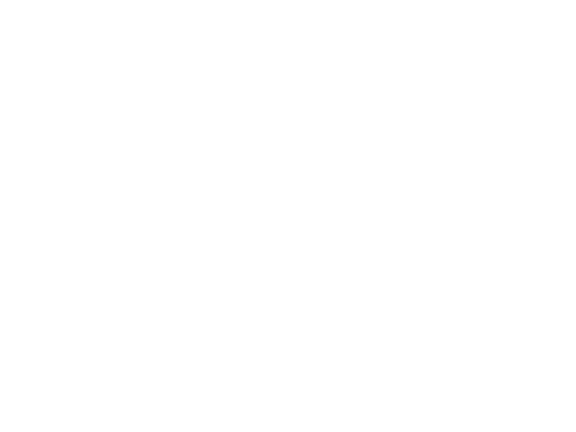

<IPython.core.display.Javascript object>


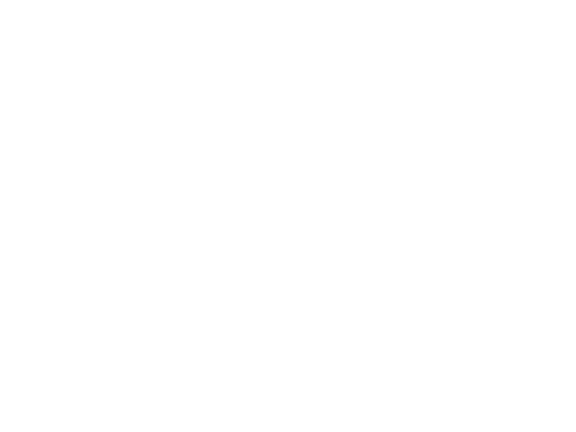

<IPython.core.display.Javascript object>


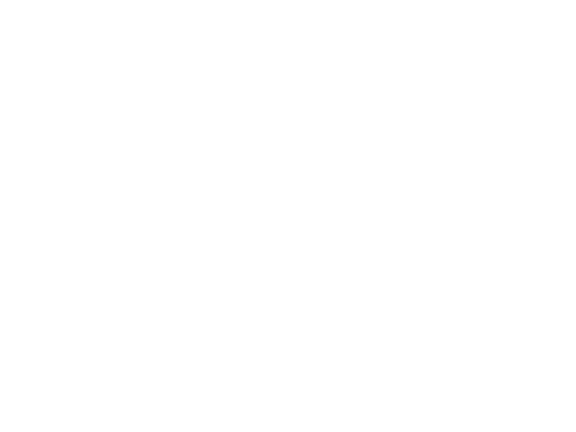

<IPython.core.display.Javascript object>


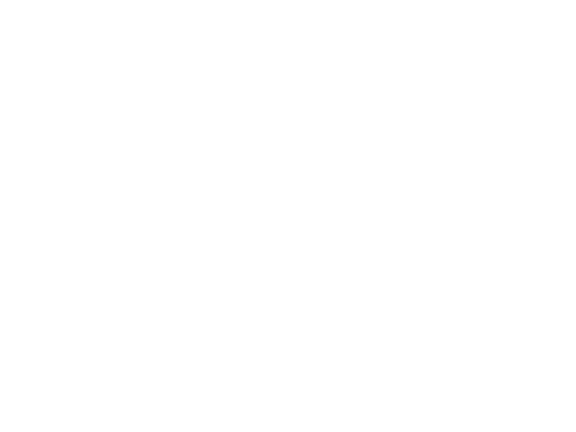

<IPython.core.display.Javascript object>


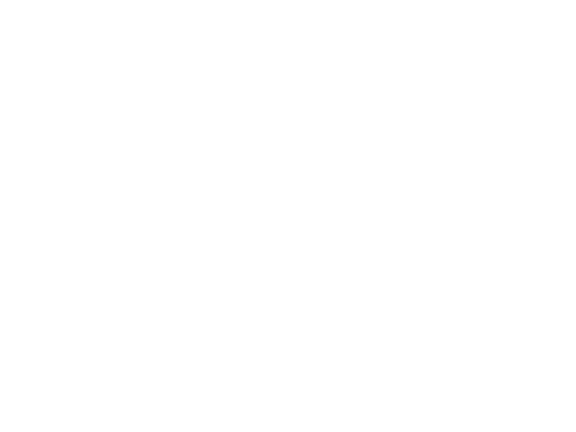

<IPython.core.display.Javascript object>


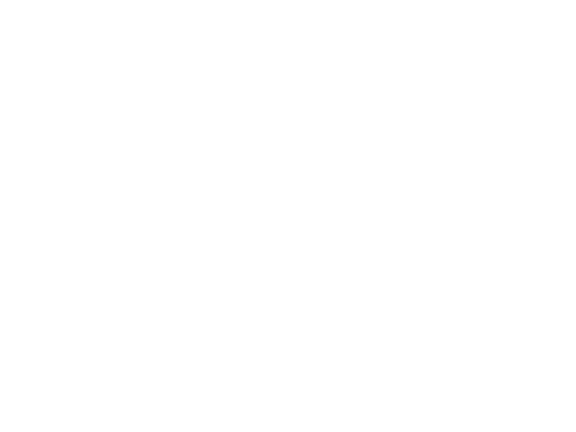

<IPython.core.display.Javascript object>


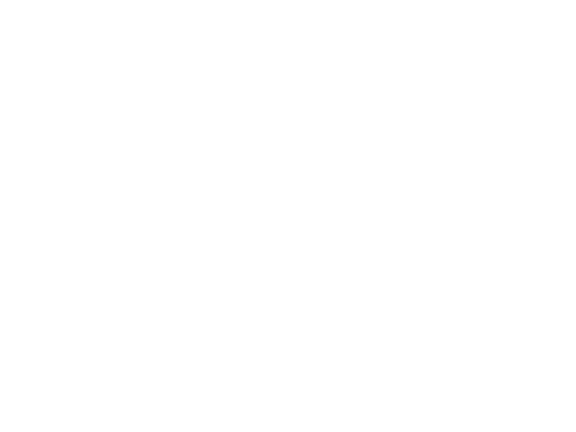

<IPython.core.display.Javascript object>


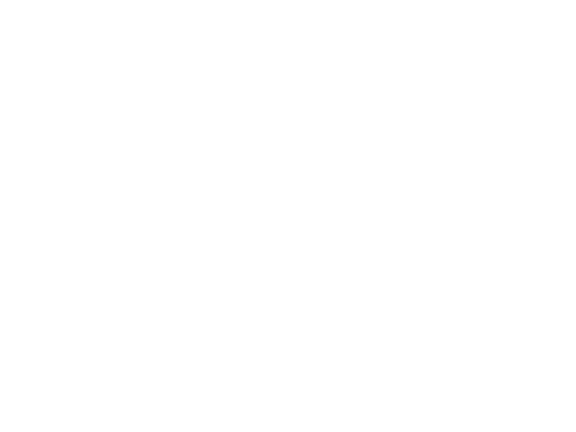

<IPython.core.display.Javascript object>


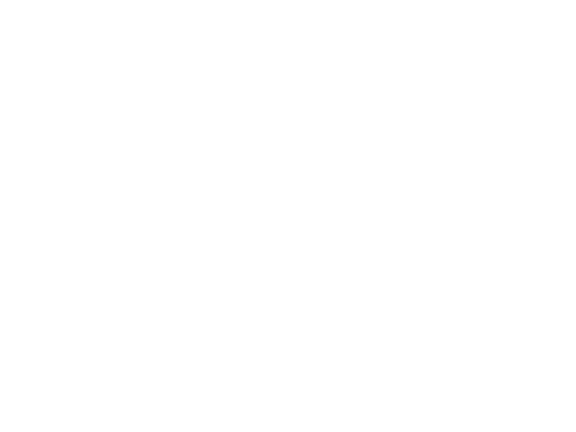

In [25]:
upper_limits_n_clusters = 5
n_clusters = 9
eps = 0.05
min_samples = 1
for act in activities:
    calculate_and_show_dbscan(data, eps, min_samples, "ACC", act)
    calculate_and_show_dbscan(data, eps, min_samples, "GYRO", act)
    calculate_and_show_dbscan(data, eps, min_samples, "MAG", act)

# Ex 3.7.1

# Ex 3.8
## Injetar outliers

In [26]:
def calculate_density_z_score(data, k):
    nr, no = z_score(data, k)
    nt = len(data)
    density = len(no) / nt * 100.0
    return density

In [27]:
def injeta_outliers(data, x_per, k, max_iter=20):
    nr, no = z_score(data, k)
    nt = len(data)
    density = len(no) / nt * 100.0
    limite_max = 2
    itera = 0
    while density < x_per and max_iter > itera:
        to_Add = round(len(nr) * (x_per - density) / 100)
        to_replace = random.choices(nr.index, k=to_Add)
        # print(to_replace)
        mean = np.mean(data)
        std = np.std(data)
        for elem in to_replace:
            s = [-1,1][random.randrange(2)]
            q = random.random() * (mean + k * std) * limite_max
            nr.loc[elem] = mean + s * k * (std + q)
        data = nr.append(no)
        nr, no = z_score(data, k)
        nt = len(data)
        density = len(no) / nt * 100.0
        itera += 1
    return data

In [28]:
aux = np.random.normal(3,0.1,10)
aux[5] = 20
aux = pd.Series(aux)
#print(calculate_density_z_score(aux,1))
print(injeta_outliers(aux, 20, 1))

0     2.754843
1     3.007590
2     2.833796
3     2.952144
4     2.947667
6     2.810307
7     3.019486
8    -8.705092
9     2.851494
5    20.000000
dtype: float64


In [29]:
aux = injeta_outliers(data= transformed_data["Stand"]["ACC"],x_per = 4, k = 2.0,max_iter = 10)
print(calculate_density_z_score(aux,2)," - ",calculate_density_z_score(transformed_data["Stand"]["ACC"],2))

3.8957500908100253  -  3.2873229204504173


# Ex 3.9


<IPython.core.display.Javascript object>


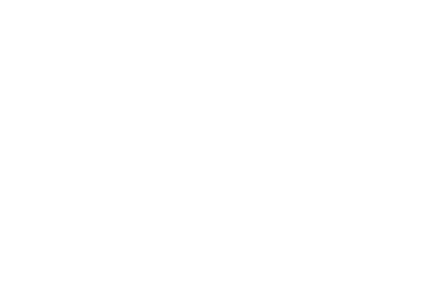

predict: [[ 5.8]
 [ 9.1]
 [12.4]
 [15.7]]
score (r^2): 0.9594713656387666
intercept: [5.8]
coefs: [[3.3]]


<IPython.core.display.Javascript object>


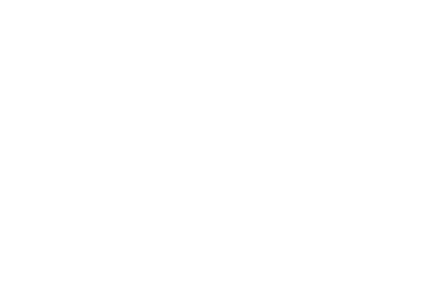

In [30]:
# Se for um modelo linear (ordem 1)

data1 = np.array([[0, 5], [1, 10], [2, 13], [3, 15]])
x = data1[:, 0].reshape(-1, 1)
y = data1[:, 1].reshape(-1, 1)
reg = LinearRegression().fit(x, y)
y_predict = reg.predict(x)
plt.scatter(x, y, color="blue")
plt.plot(x, y_predict, color="red")
plt.show()
print("predict:", reg.predict(x))
print("score (r^2):", reg.score(x, y))
print("intercept:", reg.intercept_)
print("coefs:", reg.coef_)

In [31]:
# 3D

def linear_model_order_p(data, typ, p=1000000):
    dados = data.head(p)
    dados["ones"] = 1
    X = dados[["ones", typ + "_X", typ + "_Y"]].to_numpy()
    Y = dados[[typ + "_Z"]].to_numpy()
    X_t = np.transpose(X)
    B = np.linalg.inv(X_t.dot(X)).dot(X_t).dot(Y)
    return B

In [32]:
# 1D

def linear_model_order_p_1d(data, typ, p=10000000):
    x = np.arange(0, p)
    x = np.c_[ np.ones(p),x ]  
    y = data[:p]
    x_t = np.transpose(x)
    b = np.linalg.inv(x_t.dot(x)).dot(x_t).dot(y)
    return b

In [33]:
dados = data[data["ACT_LABEL"] == activities[0]][["ACC_X","ACC_Y","ACC_Z"]]
linear_model_order_p(dados, "ACC", p=50)

<ipython-input-31-8505b8d3950c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["ones"] = 1


array([[-3.19775314],
       [-0.43160326],
       [ 0.52427603]])

In [34]:
dados = data[data["ACT_LABEL"] == activities[0]]["ACC_X"]

<IPython.core.display.Javascript object>


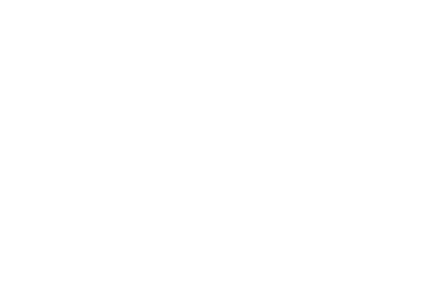

<IPython.core.display.Javascript object>


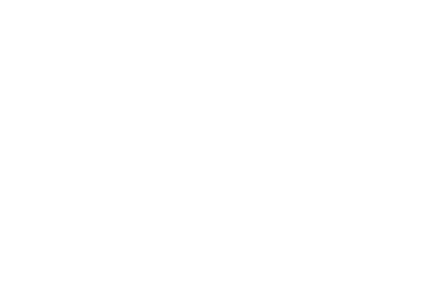

In [35]:
p = 10
b = linear_model_order_p_1d(dados, "GYRO", p=p)
x = np.arange(0, p)
plt.plot(dados[:p])
plt.plot(x,x*b[1]+b[0])


# 3.10

### Duvidas
#### E se o outlier for o valor de index  0? ou index menor que p?
#### distribuição do errro? como assim?


In [36]:
def faz_otrespontodez(data,p_valores,k_z):
    data_with_outliers = injeta_outliers(data=data, x_per=10, k=k_z, max_iter=10)
    _,find_outliers = z_score(data_with_outliers, k_z)
    print(find_outliers.index)
    for outlier in find_outliers.index:
        if outlier >= p:
            # da serie, tirar o subarray a partir do outlier(index)
            # mandar esse subarray para a RL
            # comprar com o outlier i guess.. aka persomindo que e o "valor real"
            pass
    

In [37]:
for act in activities_labels[1:]:
    dados_3_10 = transformed_data[act]["ACC"]
    dados_3_10 = injeta_outliers(data=dados_3_10, x_per=10, k=2.0, max_iter=10)
    nr, n0 = z_score(dados_3_10, 2)
    

In [38]:
faz_otrespontodez(transformed_data["Stand"]["ACC"],10,1)

Int64Index([    0,     2,     5,     9,    10,    14,    15,    45,    71,
               77,
            ...
            53063, 53065, 53066, 53067, 53070, 53071, 53072, 53073, 53074,
            53113],
           dtype='int64', length=2112)
